In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset 

In [2]:
df=pd.read_excel("/Users/yareshvijayasundaram/Downloads/CompData-1.xlsx")

### Checking the first five rows

In [3]:
df.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [4]:
df.tail()

Co_Code           Co_Name  _Operating_Expense_Rate  \
2053     2743  Kothari Ferment.             3.021580e-04   
2054    21216    Firstobj.Tech.             1.371450e-04   
2055      142  Diamines & Chem.             2.114990e-04   
2056    18014       IL&FS Engg.             3.750000e+09   
2057    43229      Channel Nine             2.981110e-04   

      _Research_and_development_expense_rate  _Cash_flow_rate  \
2053                            6.490000e+09         0.477066   
2054                            0.000000e+00         0.465211   
2055                            8.370000e+09         0.480248   
2056                            0.000000e+00         0.474670   
2057                            0.000000e+00         0.467203   

      _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2053                              0.000000     0.183014              0.322063   
2054                              0.000658     0.000000              0.319764   
2055                              0.000502     0.000000              0.327828   
2056                              0.000578     0.306205              0.322027   
2057                              0.000826     0.000000              0.330021   

      _Per_Share_Net_profit_before_tax_Yuan_  \
2053                                0.192739   
2054                                0.169391   
2055                                0.155005   
2056                                0.173834   
2057                                0.180236   

      _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
2053                                  0.022127  ...              0.320387   
2054                                  0.022072  ...              0.312324   
2055                                  0.021861  ...              0.313122   
2056                                  0.022167  ...              0.315632   
2057                                  0.022418  ...              0.316734   

      _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
2053                              0.004430                       0   
2054                              0.032284                       0   
2055                              0.040998                       0   
2056                              0.020275                       0   
2057                              0.031368                       0   

      _Total_assets_to_GNP_price  _No_credit_Interval  \
2053                    0.000420             0.624567   
2054                    0.000882             0.624008   
2055                    0.009579             0.623718   
2056                    0.004958             0.623443   
2057                    0.000186             0.623588   

      _Degree_of_Financial_Leverage_DFL  \
2053                           0.026791   
2054                           0.024201   
2055                           0.026702   
2056                           0.026943   
2057                           0.026871   

      _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
2053                                           0.565158                 1   
2054                                           0.573670                 1   
2055                                           0.564697                 1   
2056                                           0.565792                 1   
2057                                           0.565512                 1   

      _Equity_to_Liability  Default  
2053              0.171662        0  
2054              0.053740        0  
2055              0.054984        0  
2056              0.057553        0  
2057              0.020266        0  

[5 rows x 58 columns]

In [5]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [7]:
df.describe().T

count          mean  \
Co_Code                                            2058.0  1.757211e+04   
_Operating_Expense_Rate                            2058.0  2.052389e+09   
_Research_and_development_expense_rate             2058.0  1.208634e+09   
_Cash_flow_rate                                    2058.0  4.652426e-01   
_Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
_Tax_rate_A                                        2058.0  1.147770e-01   
_Cash_Flow_Per_Share                               1891.0  3.199856e-01   
_Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
_Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
_Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
_Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
_Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
_Net_Value_Growth_Rate                             2058.0  5.189504e+06   
_Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
_Cash_Reinvestment_perc                            2058.0  3.771970e-01   
_Current_Ratio                                     2058.0  1.336249e+06   
_Quick_Ratio                                       2058.0  2.775510e+07   
_Interest_Expense_Ratio                            2058.0  6.312913e-01   
_Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
_Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
_Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
_Total_Asset_Turnover                              2058.0  1.286405e-01   
_Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
_Average_Collection_Days                           2058.0  2.629786e+07   
_Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
_Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
_Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
_Operating_profit_per_person                       2058.0  4.036693e-01   
_Allocation_rate_per_person                        2058.0  5.725559e+06   
_Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
_Cash_to_Total_Assets                              1962.0  7.993675e-02   
_Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
_Cash_to_Current_Liability                         2058.0  9.282507e+07   
_Operating_Funds_to_Liability                      2058.0  3.482338e-01   
_Inventory_to_Working_Capital                      2058.0  2.777491e-01   
_Inventory_to_Current_Liability                    2058.0  5.786346e+07   
_Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
_Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
_Total_income_to_Total_expense                     2058.0  2.357977e-03   
_Total_expense_to_Assets                           2058.0  3.109208e-02   
_Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
_Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
_Cash_Turnover_Rate                                2058.0  2.653696e+09   
_Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
_Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
_Cash_Flow_to_Liability                            2058.0  4.599747e-01   
_CFO_to_Assets                                     2058.0  5.797344e-01   
_Cash_Flow_to_Equity                               2058.0  3.146292e-01   
_Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
_Liability_Assets_Flag                             2058.0  3.401361e-03   
_Total_assets_to_GNP_price                         2058.0  2.779397e+07   
_No_credit_Interval                                2058.0  6.236856e-01   
_Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
_I

In [8]:
pd.options.display.float_format = '{:.2f}'.format   
df.describe().T

count          mean  \
Co_Code                                           2058.00      17572.11   
_Operating_Expense_Rate                           2058.00 2052388835.76   
_Research_and_development_expense_rate            2058.00 1208634256.56   
_Cash_flow_rate                                   2058.00          0.47   
_Interest_bearing_debt_interest_rate              2058.00   11130223.52   
_Tax_rate_A                                       2058.00          0.11   
_Cash_Flow_Per_Share                              1891.00          0.32   
_Per_Share_Net_profit_before_tax_Yuan_            2058.00          0.18   
_Realized_Sales_Gross_Profit_Growth_Rate          2058.00          0.02   
_Operating_Profit_Growth_Rate                     2058.00          0.85   
_Continuous_Net_Profit_Growth_Rate                2058.00          0.22   
_Total_Asset_Growth_Rate                          2058.00 5287663257.05   
_Net_Value_Growth_Rate                            2058.00    5189504.37   
_Total_Asset_Return_Growth_Rate_Ratio             2058.00          0.26   
_Cash_Reinvestment_perc                           2058.00          0.38   
_Current_Ratio                                    2058.00    1336248.80   
_Quick_Ratio                                      2058.00   27755102.05   
_Interest_Expense_Ratio                           2058.00          0.63   
_Total_debt_to_Total_net_worth                    2037.00   10714285.73   
_Long_term_fund_suitability_ratio_A               2058.00          0.01   
_Net_profit_before_tax_to_Paid_in_capital         2058.00          0.18   
_Total_Asset_Turnover                             2058.00          0.13   
_Accounts_Receivable_Turnover                     2058.00   41598639.46   
_Average_Collection_Days                          2058.00   26297862.01   
_Inventory_Turnover_Rate_times                    2058.00 2030227259.48   
_Fixed_Assets_Turnover_Frequency                  2058.00 1230897959.18   
_Net_Worth_Turnover_Rate_times                    2058.00          0.04   
_Operating_profit_per_person                      2058.00          0.40   
_Allocation_rate_per_person                       2058.00    5725558.82   
_Quick_Assets_to_Total_Assets                     2058.00          0.34   
_Cash_to_Total_Assets                             1962.00          0.08   
_Quick_Assets_to_Current_Liability                2058.00   11904761.91   
_Cash_to_Current_Liability                        2058.00   92825072.90   
_Operating_Funds_to_Liability                     2058.00          0.35   
_Inventory_to_Working_Capital                     2058.00          0.28   
_Inventory_to_Current_Liability                   2058.00   57863459.68   
_Long_term_Liability_to_Current_Assets            2058.00   73401069.01   
_Retained_Earnings_to_Total_Assets                2058.00          0.93   
_Total_income_to_Total_expense                    2058.00          0.00   
_Total_expense_to_Assets                          2058.00          0.03   
_Current_Asset_Turnover_Rate                      2058.00 1273303377.07   
_Quick_Asset_Turnover_Rate                        2058.00 2571767687.08   
_Cash_Turnover_Rate                               2058.00 2653695544.22   
_Fixed_Assets_to_Assets                           2058.00    4042760.23   
_Cash_Flow_to_Total_Assets                        2058.00          0.64   
_Cash_Flow_to_Liability                           2058.00          0.46   
_CFO_to_Assets                                    2058.00          0.58   
_Cash_Flow_to_Equity                              2058.00          0.31   
_Current_Liability_to_Current_Assets              2044.00          0.04   
_Liability_Assets_Flag                            2058.00          0.00   
_Total_assets_to_GNP_price                        2058.00   27793974.74   
_No_credit_Interval                               2058.00          0.62   
_Degree_of_Financial_Leverage_DFL                 2058.00          0.03   
_I

In [9]:
df.duplicated().sum()

0

In [10]:
df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

Checking proportion of default

In [11]:
df['Default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: Default, dtype: float64

Checking for Missing Values in the dataset 

In [12]:
df.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [13]:
df.isnull().sum().sum()

298

In [14]:
df.size

119364

In [15]:
298/119364

0.00249656512851446

## PART A: Outlier Treatment

In [16]:
df_X = df.drop(['Default', 'Co_Code', 'Co_Name'], axis=1)
df_Y = df['Default']

In [17]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [18]:
((df_X > UL) | (df_X < LL)).sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 146
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                                         190
_Interest_Expense_Ratio                              328
_Total_debt_to_Total_net_worth 

In [19]:
((df_X > UL) | (df_X < LL)).sum().sum()

10864

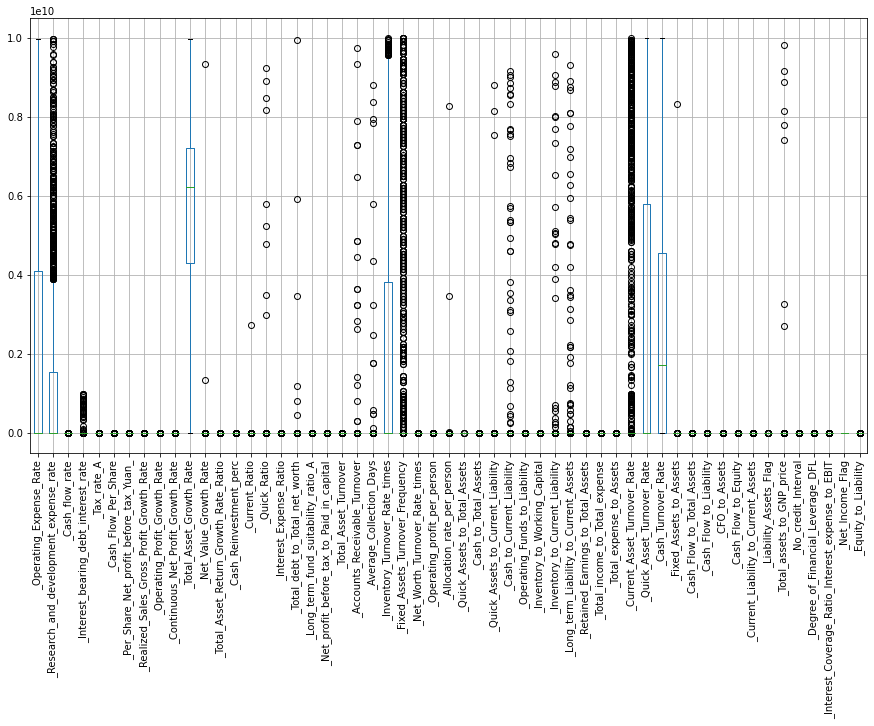

In [20]:
df_X.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [21]:
def remove_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

In [22]:
for column in df_X.columns:
    lower_limit, upper_limit = remove_outlier(df_X[column])
    df_X[column] = np.where(df_X[column] > upper_limit, upper_limit, df_X[column])
    df_X[column] = np.where(df_X[column] < lower_limit, lower_limit, df_X[column])

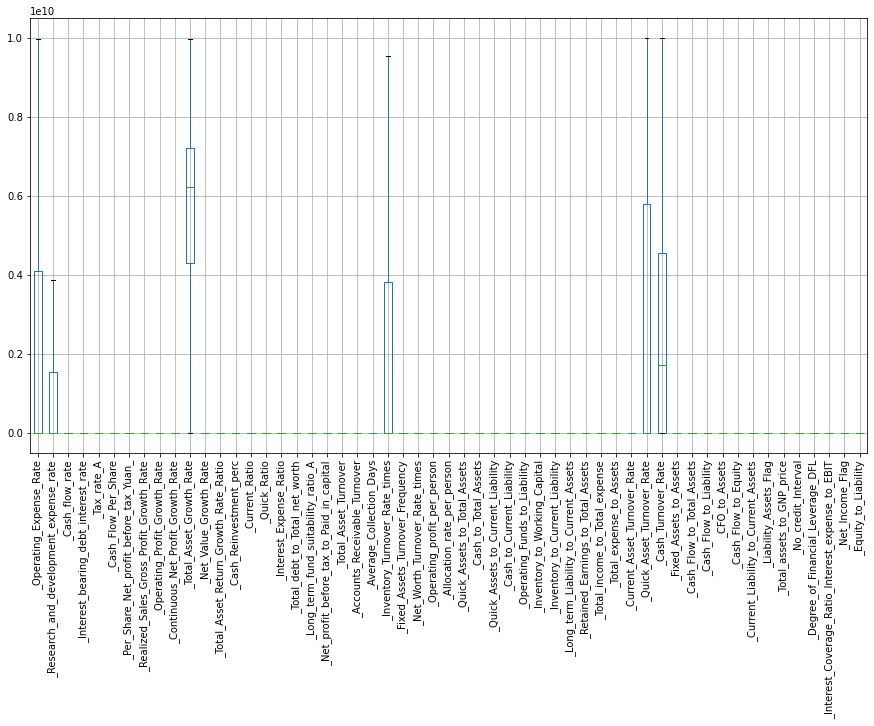

In [23]:
df_X.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

### PART A: Missing Value Treatment

In [24]:
df_X.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [26]:
df1 = pd.DataFrame(imputer.fit_transform(df_X), columns = df_X.columns)

In [27]:
df1.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

# PART A: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

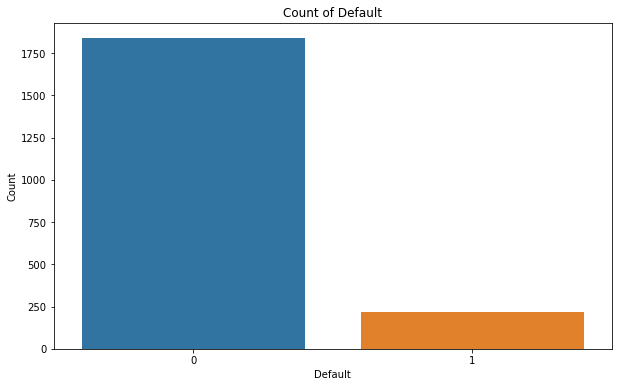

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df, x='Default')

plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count of Default')
plt.show()

In [29]:
df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [30]:
#'_Operating_Expense_Rate', 
#'_Research_and_development_expense_rate',
#'_Cash_flow_rate', 
#'_Tax_rate_A', #'_Cash_Flow_Per_Share',
#'_Per_Share_Net_profit_before_tax_Yuan_', 
#'_Total_Asset_Growth_Rate',
#'_Total_debt_to_Total_net_worth', '_Total_Asset_Turnover',
#'_Average_Collection_Days', '_Inventory_Turnover_Rate_times',
#'_Fixed_Assets_Turnover_Frequency', '_Operating_profit_per_person',
#'_Allocation_rate_per_person', '_Quick_Assets_to_Total_Assets',
#'_Cash_to_Total_Assets', '_Cash_to_Current_Liability',
#'_Inventory_to_Current_Liability',
#'_Long_term_Liability_to_Current_Assets', '_Total_expense_to_Assets',
#'_Quick_Asset_Turnover_Rate', '_Cash_Turnover_Rate',
#'_Fixed_Assets_to_Assets', '_Cash_Flow_to_Equity',
#'_Current_Liability_to_Current_Assets', '_Total_assets_to_GNP_price',
#_Equity_to_Liability', 'Default'

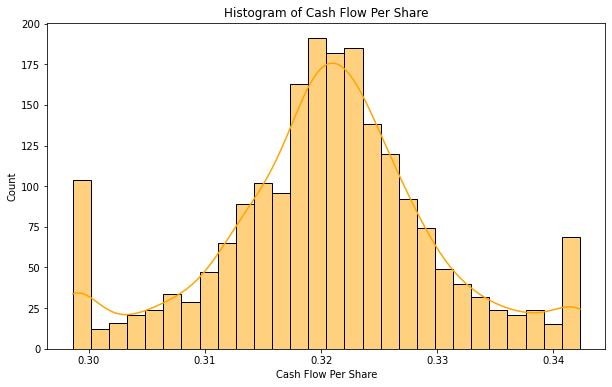

In [31]:
plt.figure(figsize=(10, 6))  

sns.histplot(data=df1, x='_Cash_Flow_Per_Share', color='Orange', kde=True)

plt.xlabel('Cash Flow Per Share')
plt.ylabel('Count')
plt.title('Histogram of Cash Flow Per Share')

plt.show()

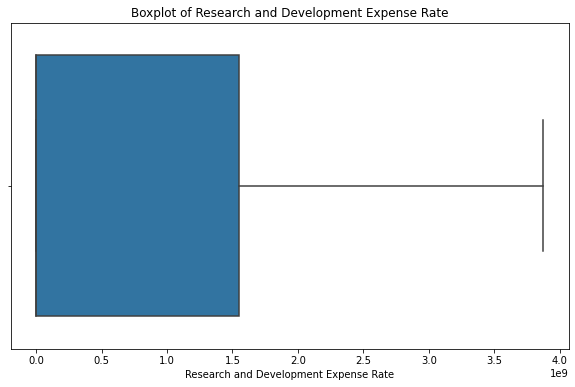

In [32]:
plt.figure(figsize=(10, 6))  

sns.boxplot(data=df1, x="_Research_and_development_expense_rate")

plt.xlabel("Research and Development Expense Rate")
plt.title("Boxplot of Research and Development Expense Rate")

plt.show()

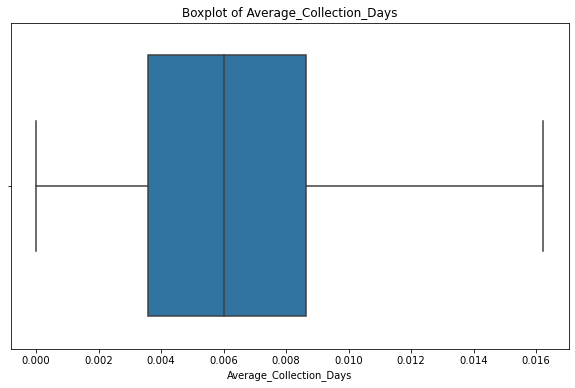

In [33]:
plt.figure(figsize=(10, 6))  

sns.boxplot(data=df1, x="_Average_Collection_Days")

plt.xlabel("Average_Collection_Days")
plt.title("Boxplot of Average_Collection_Days")

plt.show()

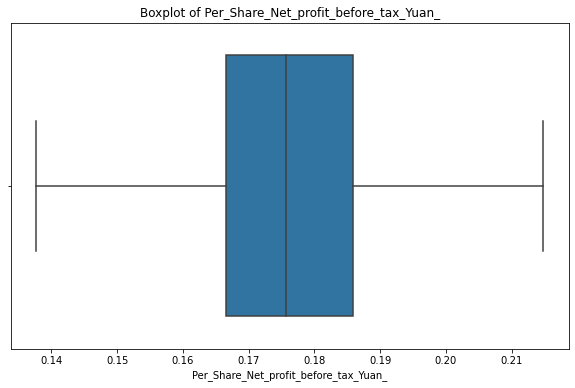

In [34]:
plt.figure(figsize=(10, 6))  

sns.boxplot(data=df1, x="_Per_Share_Net_profit_before_tax_Yuan_")

plt.xlabel("Per_Share_Net_profit_before_tax_Yuan_")
plt.title("Boxplot of Per_Share_Net_profit_before_tax_Yuan_")

plt.show()

# Bivariate 

In [35]:
BV = pd.concat([df1, df_Y], axis = 1)

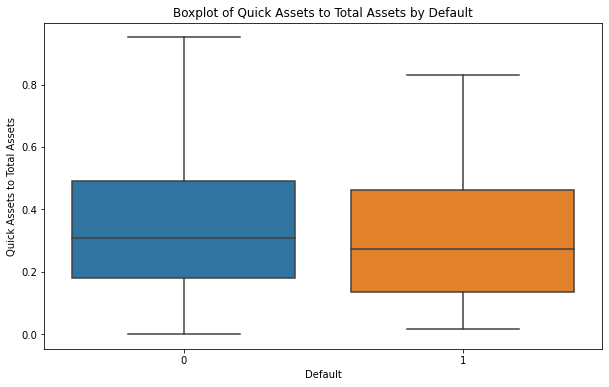

In [36]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=BV, x='Default', y='_Quick_Assets_to_Total_Assets')

plt.xlabel('Default')
plt.ylabel('Quick Assets to Total Assets')
plt.title('Boxplot of Quick Assets to Total Assets by Default')

plt.show()

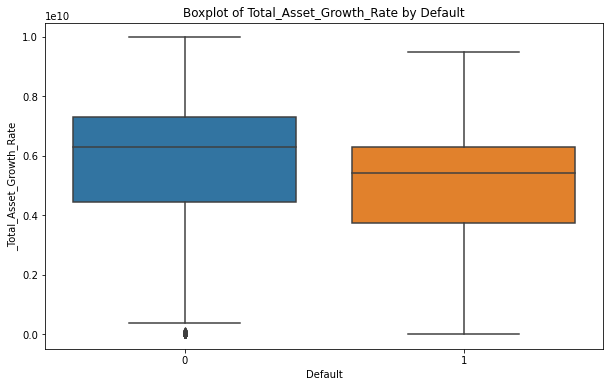

In [37]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=BV, x='Default', y='_Total_Asset_Growth_Rate')

plt.xlabel('Default')
plt.ylabel('_Total_Asset_Growth_Rate')
plt.title('Boxplot of Total_Asset_Growth_Rate by Default')

plt.show()

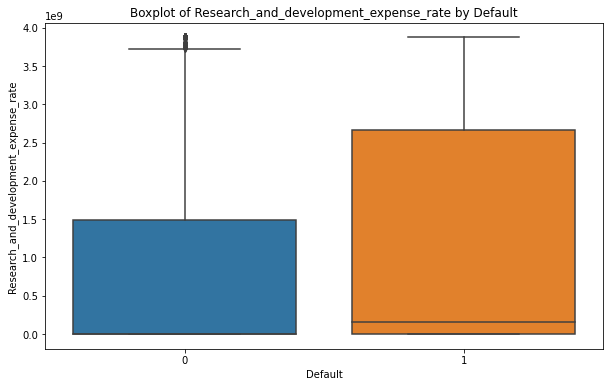

In [38]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=BV, x='Default', y='_Research_and_development_expense_rate')

plt.xlabel('Default')
plt.ylabel('Research_and_development_expense_rate')
plt.title('Boxplot of Research_and_development_expense_rate by Default')

plt.show()

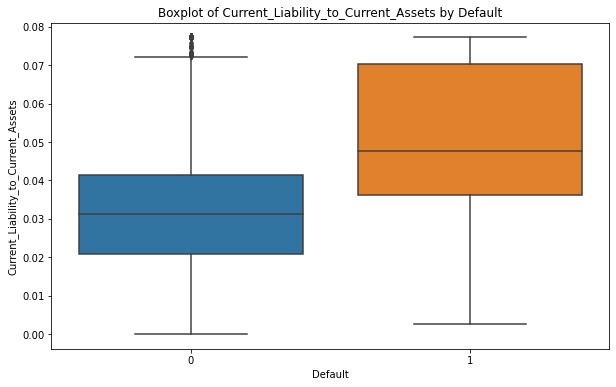

In [39]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=BV, x='Default', y='_Current_Liability_to_Current_Assets')

plt.xlabel('Default')
plt.ylabel('Current_Liability_to_Current_Assets')
plt.title('Boxplot of Current_Liability_to_Current_Assets by Default')

plt.show()

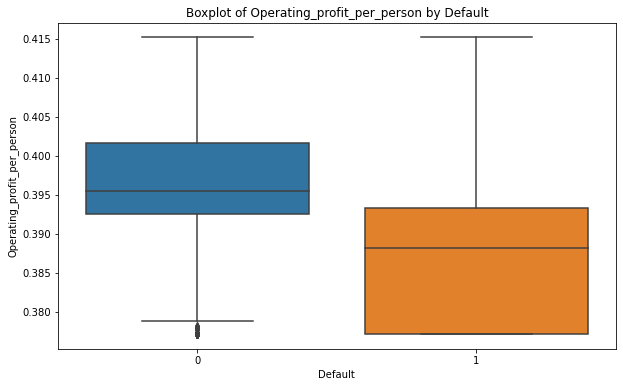

In [40]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=BV, x='Default', y='_Operating_profit_per_person')

plt.xlabel('Default')
plt.ylabel('Operating_profit_per_person')
plt.title('Boxplot of Operating_profit_per_person by Default')

plt.show()

In [41]:
df1 = df1.drop(['_Realized_Sales_Gross_Profit_Growth_Rate', 
                  '_Operating_Profit_Growth_Rate', 
                  '_Continuous_Net_Profit_Growth_Rate', 
                  '_Current_Asset_Turnover_Rate', 
                  '_Cash_Flow_to_Liability', 
                  '_No_credit_Interval', 
                  '_Degree_of_Financial_Leverage_DFL', 
                  '_Interest_bearing_debt_interest_rate', 
                  '_Net_Value_Growth_Rate', 
                  '_Total_Asset_Return_Growth_Rate_Ratio', 
                  '_Interest_Expense_Ratio', 
                  '_Long_term_fund_suitability_ratio_A', 
                  '_Accounts_Receivable_Turnover', 
                  '_Inventory_to_Working_Capital', 
                  '_Retained_Earnings_to_Total_Assets', 
                  '_Total_income_to_Total_expense', 
                  '_Interest_Coverage_Ratio_Interest_expense_to_EBIT'],axis=1)

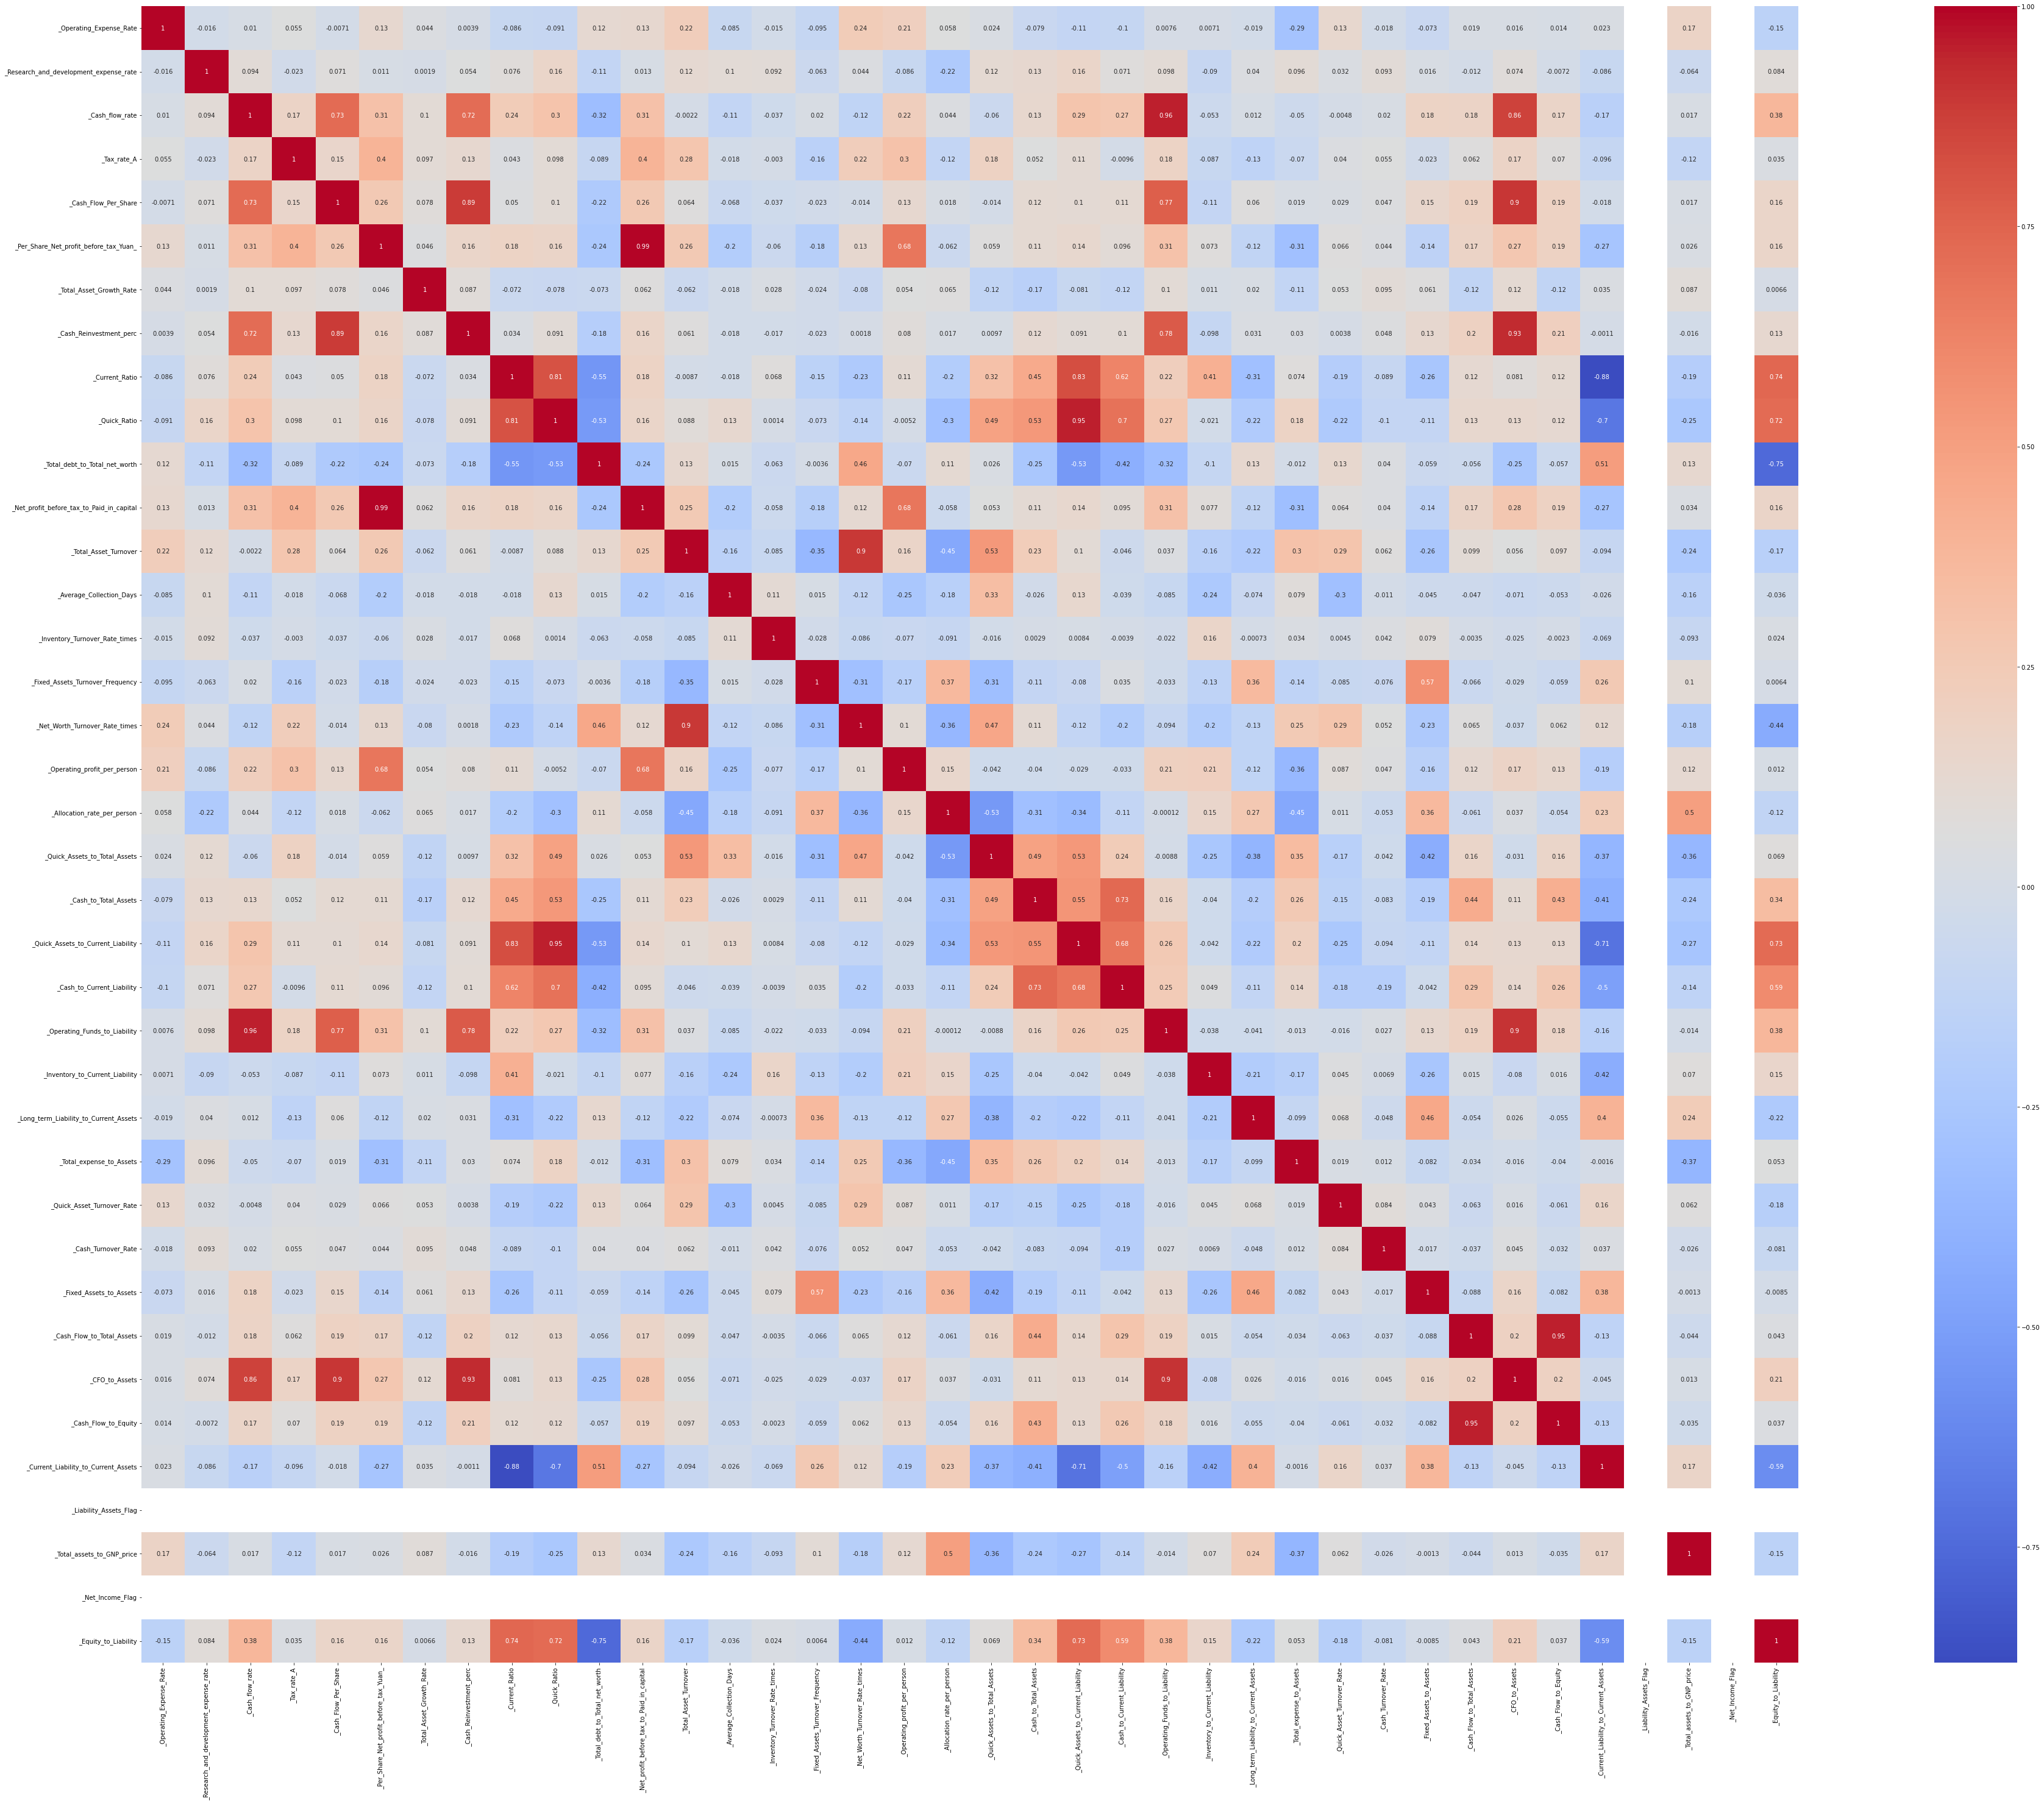

In [42]:
plt.figure(figsize=(80,50))  # setting the size of figure to 12 by 10
p=sns.heatmap(df1.corr(), annot=True,cmap='coolwarm',square=True)

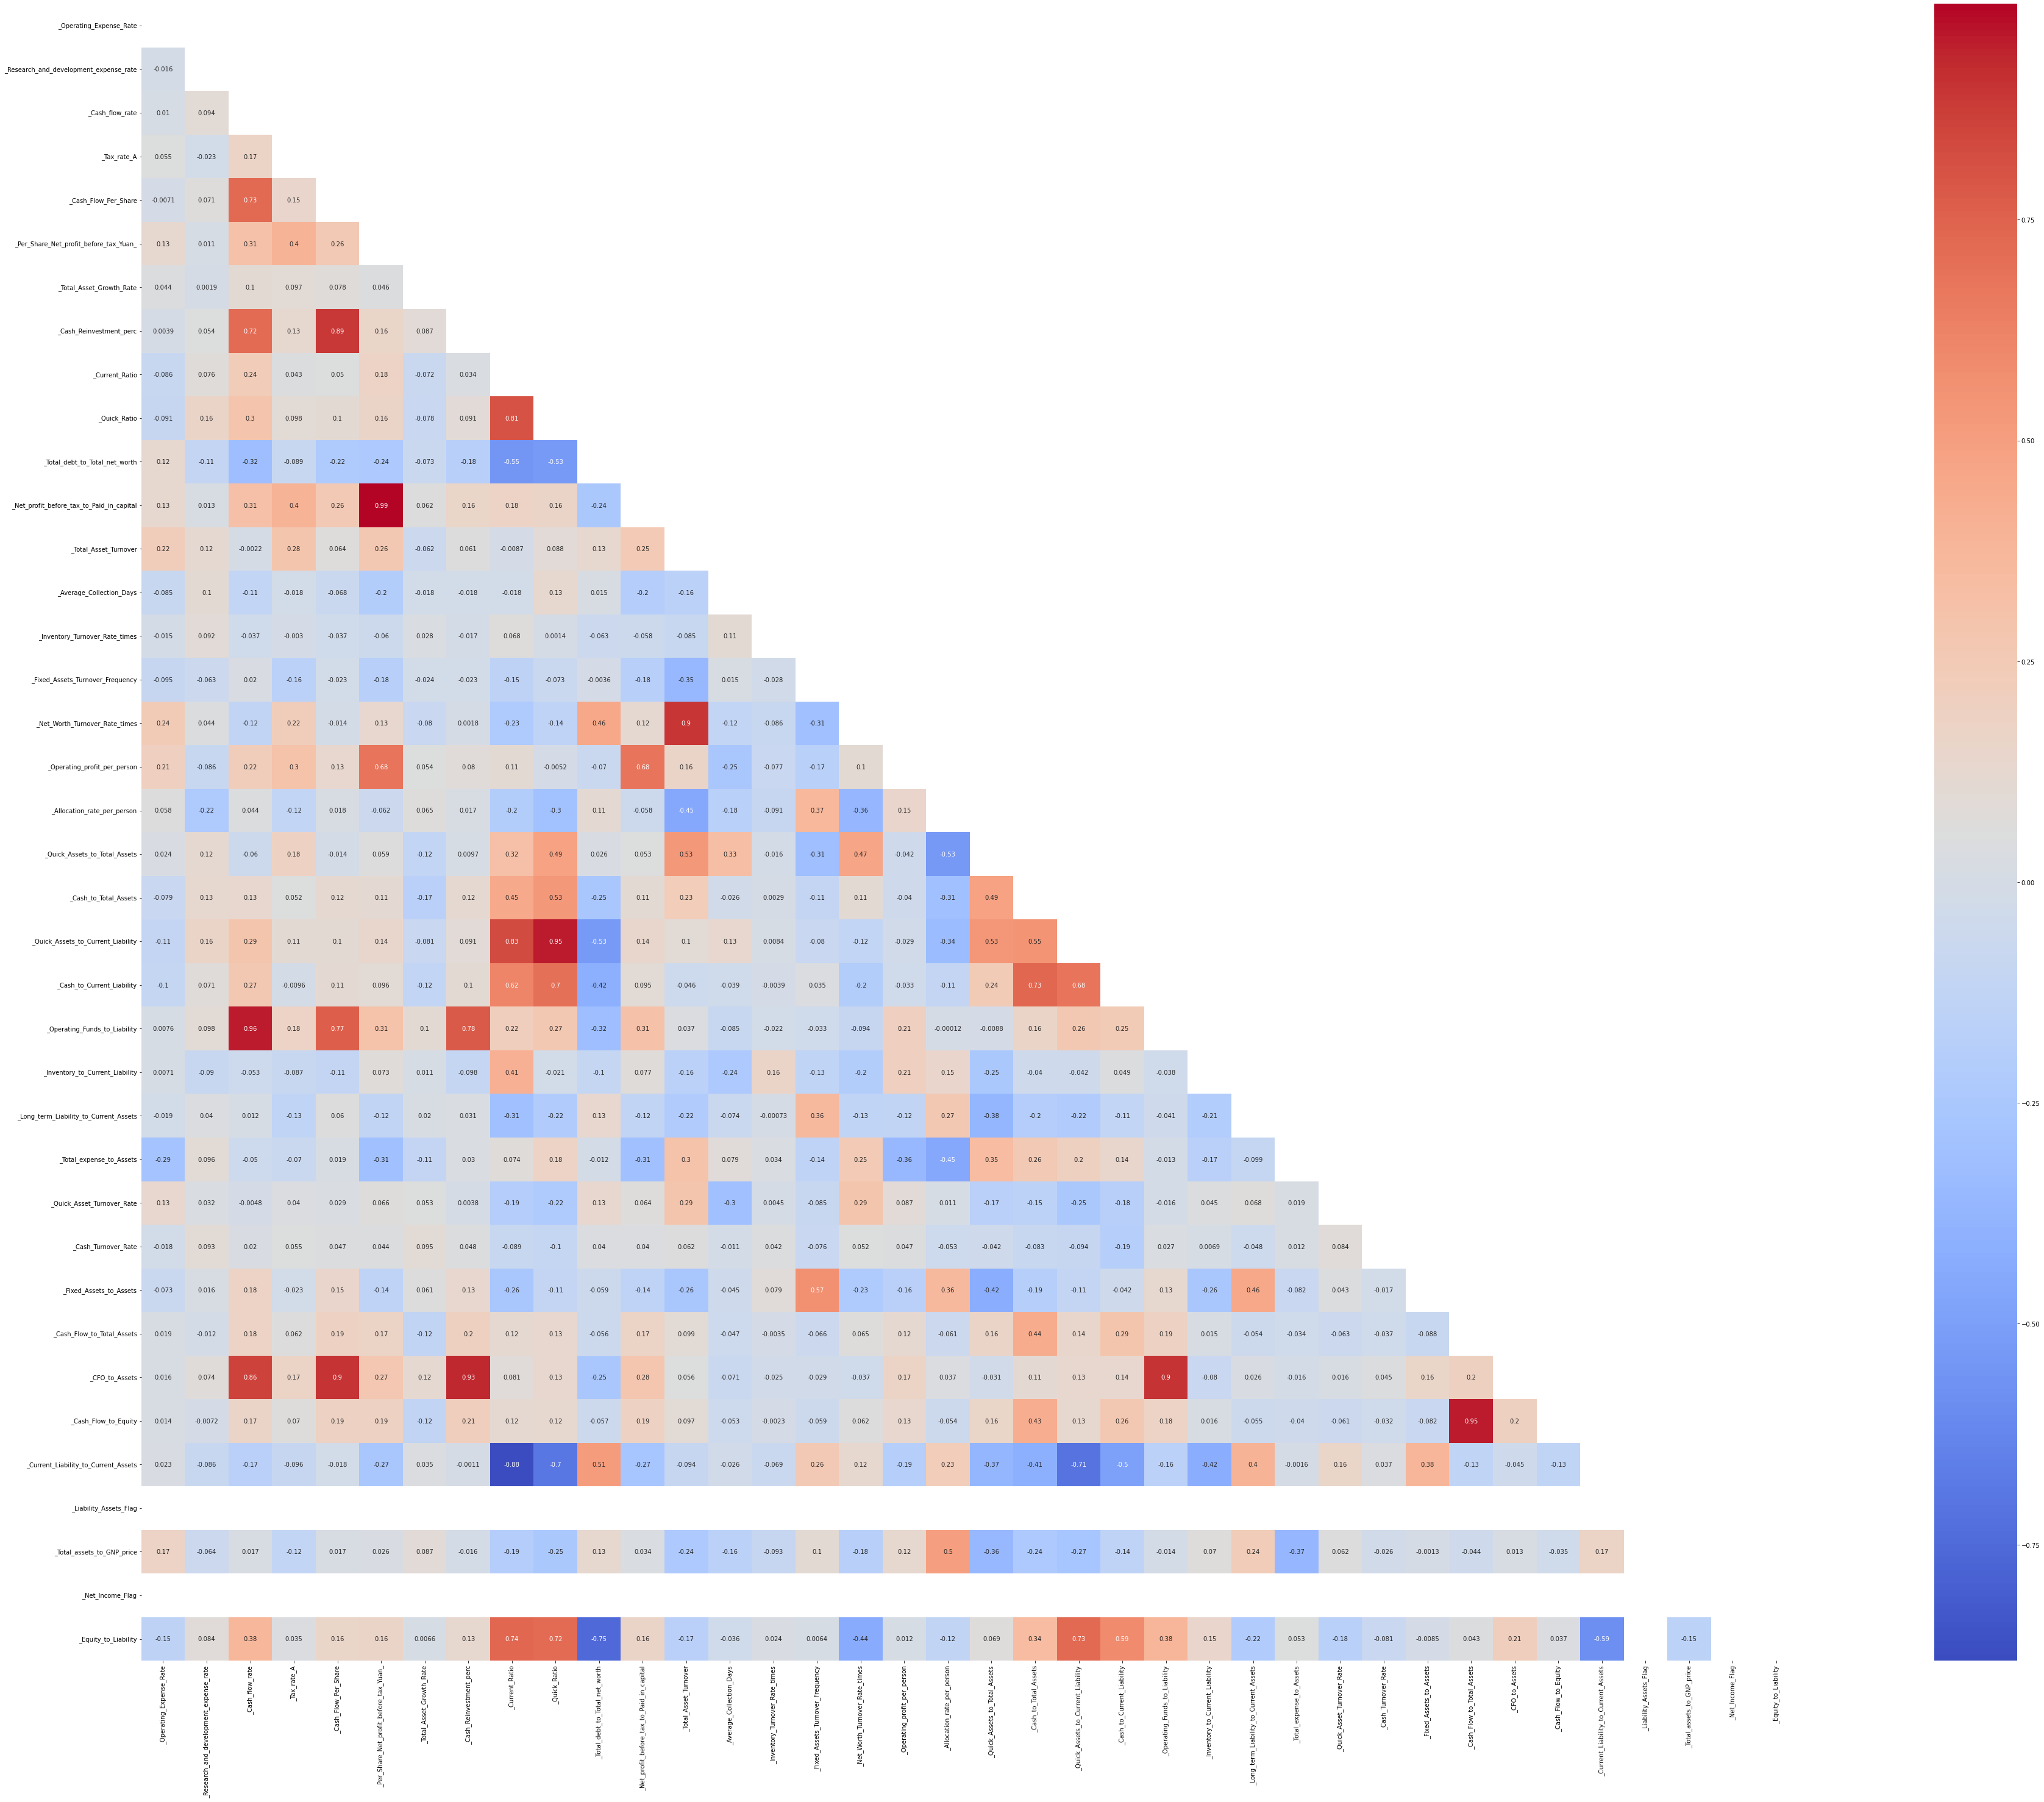

In [43]:
plt.figure(figsize=(80, 50))
corr_matrix = df1.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
p = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask)


In [44]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df1), columns =df1.columns)

# VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
11  _Net_profit_before_tax_to_Paid_in_capital 95.99
5      _Per_Share_Net_profit_before_tax_Yuan_ 95.91
31                             _CFO_to_Assets 28.40
23              _Operating_Funds_to_Liability 20.92
21         _Quick_Assets_to_Current_Liability 19.15
2                             _Cash_flow_rate 15.86
16             _Net_Worth_Turnover_Rate_times 14.18
8                              _Current_Ratio 13.87
12                      _Total_Asset_Turnover 12.81
9                                _Quick_Ratio 12.31
30                 _Cash_Flow_to_Total_Assets 12.23
32                       _Cash_Flow_to_Equity 12.20
7                     _Cash_Reinvestment_perc 12.19
33       _Current_Liability_to_Current_Assets  6.65
4                        _Cash_Flow_Per_Share  6.43
37                       _Equity_to_Liability  5.98
19              _Quick_Assets_to_Total_Assets  5.64
10             _Total_debt_to_Total_net_worth  4.28
22                 _Cash_to_Current_Liability  4.24
20                      _Cash_to_Total_Assets  3.66
24            _Inventory_to_Current_Liability  3.20
29                    _Fixed_Assets_to_Assets  2.72
18                _Allocation_rate_per_person  2.50
17               _Operating_profit_per_person  2.36
26                   _Total_expense_to_Assets  2.01
15           _Fixed_Assets_Turnover_Frequency  1.75
13                   _Average_Collection_Days  1.74
35                 _Total_assets_to_GNP_price  1.70
25     _Long_term_Liability_to_Current_Assets  1.67
27                 _Quick_Asset_Turnover_Rate  1.36
3                                 _Tax_rate_A  1.35
0                     _Operating_Expense_Rate  1.30
1      _Research_and_development_expense_rate  1.17
14             _Inventory_Turnover_Rate_times  1.15
6                    _Total_Asset_Growth_Rate  1.12
28                        _Cash_Turnover_Rate  1.10
34                     _Liability_Assets_Flag   NaN
36                           _Net_Income_Flag   NaN

In [47]:
X = X.drop('_Net_profit_before_tax_to_Paid_in_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
30                          _CFO_to_Assets 27.86
22           _Operating_Funds_to_Liability 20.88
20      _Quick_Assets_to_Current_Liability 19.15
2                          _Cash_flow_rate 15.85
15          _Net_Worth_Turnover_Rate_times 14.16
8                           _Current_Ratio 13.86
11                   _Total_Asset_Turnover 12.81
9                             _Quick_Ratio 12.31
29              _Cash_Flow_to_Total_Assets 12.16
31                    _Cash_Flow_to_Equity 12.14
7                  _Cash_Reinvestment_perc 12.12
32    _Current_Liability_to_Current_Assets  6.64
4                     _Cash_Flow_Per_Share  6.38
36                    _Equity_to_Liability  5.98
18           _Quick_Assets_to_Total_Assets  5.64
10          _Total_debt_to_Total_net_worth  4.26
21              _Cash_to_Current_Liability  4.24
19                   _Cash_to_Total_Assets  3.66
23         _Inventory_to_Current_Liability  3.20
5   _Per_Share_Net_profit_before_tax_Yuan_  2.80
28                 _Fixed_Assets_to_Assets  2.72
17             _Allocation_rate_per_person  2.49
16            _Operating_profit_per_person  2.35
25                _Total_expense_to_Assets  2.01
14        _Fixed_Assets_Turnover_Frequency  1.75
12                _Average_Collection_Days  1.74
34              _Total_assets_to_GNP_price  1.70
24  _Long_term_Liability_to_Current_Assets  1.67
26              _Quick_Asset_Turnover_Rate  1.36
3                              _Tax_rate_A  1.35
0                  _Operating_Expense_Rate  1.30
1   _Research_and_development_expense_rate  1.17
13          _Inventory_Turnover_Rate_times  1.15
6                 _Total_Asset_Growth_Rate  1.11
27                     _Cash_Turnover_Rate  1.10
33                  _Liability_Assets_Flag   NaN
35                        _Net_Income_Flag   NaN

In [48]:
X = X.drop('_CFO_to_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
20      _Quick_Assets_to_Current_Liability 19.14
22           _Operating_Funds_to_Liability 18.36
2                          _Cash_flow_rate 15.33
15          _Net_Worth_Turnover_Rate_times 14.16
8                           _Current_Ratio 13.86
11                   _Total_Asset_Turnover 12.81
9                             _Quick_Ratio 12.31
29              _Cash_Flow_to_Total_Assets 12.08
30                    _Cash_Flow_to_Equity 12.05
31    _Current_Liability_to_Current_Assets  6.64
7                  _Cash_Reinvestment_perc  6.42
35                    _Equity_to_Liability  5.93
4                     _Cash_Flow_Per_Share  5.67
18           _Quick_Assets_to_Total_Assets  5.63
21              _Cash_to_Current_Liability  4.23
10          _Total_debt_to_Total_net_worth  4.21
19                   _Cash_to_Total_Assets  3.66
23         _Inventory_to_Current_Liability  3.19
5   _Per_Share_Net_profit_before_tax_Yuan_  2.77
28                 _Fixed_Assets_to_Assets  2.72
17             _Allocation_rate_per_person  2.48
16            _Operating_profit_per_person  2.35
25                _Total_expense_to_Assets  2.01
14        _Fixed_Assets_Turnover_Frequency  1.74
12                _Average_Collection_Days  1.74
33              _Total_assets_to_GNP_price  1.69
24  _Long_term_Liability_to_Current_Assets  1.67
26              _Quick_Asset_Turnover_Rate  1.36
3                              _Tax_rate_A  1.35
0                  _Operating_Expense_Rate  1.30
1   _Research_and_development_expense_rate  1.17
13          _Inventory_Turnover_Rate_times  1.15
6                 _Total_Asset_Growth_Rate  1.10
27                     _Cash_Turnover_Rate  1.10
32                  _Liability_Assets_Flag   NaN
34                        _Net_Income_Flag   NaN

In [49]:
X = X.drop('_Quick_Assets_to_Current_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
21           _Operating_Funds_to_Liability 18.15
2                          _Cash_flow_rate 15.08
15          _Net_Worth_Turnover_Rate_times 14.12
11                   _Total_Asset_Turnover 12.74
28              _Cash_Flow_to_Total_Assets 12.05
29                    _Cash_Flow_to_Equity 12.03
8                           _Current_Ratio 12.00
9                             _Quick_Ratio  7.75
30    _Current_Liability_to_Current_Assets  6.62
7                  _Cash_Reinvestment_perc  6.42
4                     _Cash_Flow_Per_Share  5.67
34                    _Equity_to_Liability  5.65
18           _Quick_Assets_to_Total_Assets  4.97
20              _Cash_to_Current_Liability  4.23
10          _Total_debt_to_Total_net_worth  4.20
19                   _Cash_to_Total_Assets  3.66
22         _Inventory_to_Current_Liability  2.94
5   _Per_Share_Net_profit_before_tax_Yuan_  2.77
27                 _Fixed_Assets_to_Assets  2.61
17             _Allocation_rate_per_person  2.45
16            _Operating_profit_per_person  2.34
24                _Total_expense_to_Assets  2.01
14        _Fixed_Assets_Turnover_Frequency  1.74
12                _Average_Collection_Days  1.74
32              _Total_assets_to_GNP_price  1.69
23  _Long_term_Liability_to_Current_Assets  1.64
25              _Quick_Asset_Turnover_Rate  1.36
3                              _Tax_rate_A  1.34
0                  _Operating_Expense_Rate  1.30
1   _Research_and_development_expense_rate  1.17
13          _Inventory_Turnover_Rate_times  1.15
6                 _Total_Asset_Growth_Rate  1.10
26                     _Cash_Turnover_Rate  1.09
31                  _Liability_Assets_Flag   NaN
33                        _Net_Income_Flag   NaN

In [50]:
X = X.drop('_Operating_Funds_to_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
15          _Net_Worth_Turnover_Rate_times 13.98
11                   _Total_Asset_Turnover 12.60
27              _Cash_Flow_to_Total_Assets 12.02
28                    _Cash_Flow_to_Equity 11.98
8                           _Current_Ratio 11.84
9                             _Quick_Ratio  7.65
29    _Current_Liability_to_Current_Assets  6.61
7                  _Cash_Reinvestment_perc  5.73
4                     _Cash_Flow_Per_Share  5.67
33                    _Equity_to_Liability  5.16
18           _Quick_Assets_to_Total_Assets  4.87
20              _Cash_to_Current_Liability  4.22
10          _Total_debt_to_Total_net_worth  4.17
19                   _Cash_to_Total_Assets  3.64
2                          _Cash_flow_rate  3.26
21         _Inventory_to_Current_Liability  2.87
5   _Per_Share_Net_profit_before_tax_Yuan_  2.76
26                 _Fixed_Assets_to_Assets  2.61
17             _Allocation_rate_per_person  2.44
16            _Operating_profit_per_person  2.34
23                _Total_expense_to_Assets  2.01
14        _Fixed_Assets_Turnover_Frequency  1.74
12                _Average_Collection_Days  1.73
31              _Total_assets_to_GNP_price  1.69
22  _Long_term_Liability_to_Current_Assets  1.64
24              _Quick_Asset_Turnover_Rate  1.36
3                              _Tax_rate_A  1.34
0                  _Operating_Expense_Rate  1.30
1   _Research_and_development_expense_rate  1.17
13          _Inventory_Turnover_Rate_times  1.15
6                 _Total_Asset_Growth_Rate  1.10
25                     _Cash_Turnover_Rate  1.09
30                  _Liability_Assets_Flag   NaN
32                        _Net_Income_Flag   NaN

In [51]:
X = X.drop('_Net_Worth_Turnover_Rate_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
26              _Cash_Flow_to_Total_Assets 12.02
27                    _Cash_Flow_to_Equity 11.98
8                           _Current_Ratio 11.80
9                             _Quick_Ratio  7.58
28    _Current_Liability_to_Current_Assets  6.61
7                  _Cash_Reinvestment_perc  5.72
4                     _Cash_Flow_Per_Share  5.67
32                    _Equity_to_Liability  5.11
17           _Quick_Assets_to_Total_Assets  4.87
19              _Cash_to_Current_Liability  4.22
18                   _Cash_to_Total_Assets  3.64
2                          _Cash_flow_rate  3.26
11                   _Total_Asset_Turnover  3.03
10          _Total_debt_to_Total_net_worth  2.96
20         _Inventory_to_Current_Liability  2.85
5   _Per_Share_Net_profit_before_tax_Yuan_  2.76
25                 _Fixed_Assets_to_Assets  2.60
16             _Allocation_rate_per_person  2.43
15            _Operating_profit_per_person  2.34
22                _Total_expense_to_Assets  2.00
14        _Fixed_Assets_Turnover_Frequency  1.73
12                _Average_Collection_Days  1.73
30              _Total_assets_to_GNP_price  1.68
21  _Long_term_Liability_to_Current_Assets  1.64
23              _Quick_Asset_Turnover_Rate  1.36
3                              _Tax_rate_A  1.34
0                  _Operating_Expense_Rate  1.30
1   _Research_and_development_expense_rate  1.16
13          _Inventory_Turnover_Rate_times  1.15
6                 _Total_Asset_Growth_Rate  1.10
24                     _Cash_Turnover_Rate  1.09
29                  _Liability_Assets_Flag   NaN
31                        _Net_Income_Flag   NaN

In [52]:
X = X.drop('_Cash_Flow_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
8                           _Current_Ratio 11.80
9                             _Quick_Ratio  7.58
27    _Current_Liability_to_Current_Assets  6.60
7                  _Cash_Reinvestment_perc  5.65
4                     _Cash_Flow_Per_Share  5.64
31                    _Equity_to_Liability  5.10
17           _Quick_Assets_to_Total_Assets  4.87
19              _Cash_to_Current_Liability  4.18
18                   _Cash_to_Total_Assets  3.64
2                          _Cash_flow_rate  3.22
11                   _Total_Asset_Turnover  3.02
10          _Total_debt_to_Total_net_worth  2.96
20         _Inventory_to_Current_Liability  2.85
5   _Per_Share_Net_profit_before_tax_Yuan_  2.74
25                 _Fixed_Assets_to_Assets  2.60
16             _Allocation_rate_per_person  2.43
15            _Operating_profit_per_person  2.34
22                _Total_expense_to_Assets  1.99
14        _Fixed_Assets_Turnover_Frequency  1.73
12                _Average_Collection_Days  1.73
29              _Total_assets_to_GNP_price  1.68
21  _Long_term_Liability_to_Current_Assets  1.64
26                    _Cash_Flow_to_Equity  1.38
23              _Quick_Asset_Turnover_Rate  1.36
3                              _Tax_rate_A  1.34
0                  _Operating_Expense_Rate  1.30
1   _Research_and_development_expense_rate  1.16
13          _Inventory_Turnover_Rate_times  1.15
6                 _Total_Asset_Growth_Rate  1.10
24                     _Cash_Turnover_Rate  1.09
28                  _Liability_Assets_Flag   NaN
30                        _Net_Income_Flag   NaN

In [53]:
X = X.drop('_Current_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
8                             _Quick_Ratio 5.96
7                  _Cash_Reinvestment_perc 5.64
4                     _Cash_Flow_Per_Share 5.63
16           _Quick_Assets_to_Total_Assets 4.84
30                    _Equity_to_Liability 4.61
26    _Current_Liability_to_Current_Assets 4.40
18              _Cash_to_Current_Liability 4.18
17                   _Cash_to_Total_Assets 3.63
2                          _Cash_flow_rate 3.22
10                   _Total_Asset_Turnover 3.00
9           _Total_debt_to_Total_net_worth 2.93
5   _Per_Share_Net_profit_before_tax_Yuan_ 2.72
24                 _Fixed_Assets_to_Assets 2.60
15             _Allocation_rate_per_person 2.43
14            _Operating_profit_per_person 2.34
19         _Inventory_to_Current_Liability 2.29
21                _Total_expense_to_Assets 1.99
13        _Fixed_Assets_Turnover_Frequency 1.73
11                _Average_Collection_Days 1.70
28              _Total_assets_to_GNP_price 1.67
20  _Long_term_Liability_to_Current_Assets 1.62
25                    _Cash_Flow_to_Equity 1.38
22              _Quick_Asset_Turnover_Rate 1.35
3                              _Tax_rate_A 1.34
0                  _Operating_Expense_Rate 1.30
1   _Research_and_development_expense_rate 1.16
12          _Inventory_Turnover_Rate_times 1.15
6                 _Total_Asset_Growth_Rate 1.10
23                     _Cash_Turnover_Rate 1.09
27                  _Liability_Assets_Flag  NaN
29                        _Net_Income_Flag  NaN

In [54]:
X = X.drop('_Quick_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
7                  _Cash_Reinvestment_perc 5.64
4                     _Cash_Flow_Per_Share 5.61
15           _Quick_Assets_to_Total_Assets 4.10
29                    _Equity_to_Liability 3.80
25    _Current_Liability_to_Current_Assets 3.65
17              _Cash_to_Current_Liability 3.61
16                   _Cash_to_Total_Assets 3.56
2                          _Cash_flow_rate 3.19
9                    _Total_Asset_Turnover 3.00
8           _Total_debt_to_Total_net_worth 2.92
5   _Per_Share_Net_profit_before_tax_Yuan_ 2.72
23                 _Fixed_Assets_to_Assets 2.51
14             _Allocation_rate_per_person 2.42
13            _Operating_profit_per_person 2.34
18         _Inventory_to_Current_Liability 2.23
20                _Total_expense_to_Assets 1.99
12        _Fixed_Assets_Turnover_Frequency 1.73
10                _Average_Collection_Days 1.70
27              _Total_assets_to_GNP_price 1.67
19  _Long_term_Liability_to_Current_Assets 1.58
24                    _Cash_Flow_to_Equity 1.38
21              _Quick_Asset_Turnover_Rate 1.35
3                              _Tax_rate_A 1.34
0                  _Operating_Expense_Rate 1.30
1   _Research_and_development_expense_rate 1.15
11          _Inventory_Turnover_Rate_times 1.14
6                 _Total_Asset_Growth_Rate 1.10
22                     _Cash_Turnover_Rate 1.09
26                  _Liability_Assets_Flag  NaN
28                        _Net_Income_Flag  NaN

In [55]:
X = X.drop('_Cash_Reinvestment_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
14           _Quick_Assets_to_Total_Assets 4.10
28                    _Equity_to_Liability 3.79
24    _Current_Liability_to_Current_Assets 3.63
16              _Cash_to_Current_Liability 3.60
15                   _Cash_to_Total_Assets 3.55
8                    _Total_Asset_Turnover 2.99
7           _Total_debt_to_Total_net_worth 2.91
2                          _Cash_flow_rate 2.88
5   _Per_Share_Net_profit_before_tax_Yuan_ 2.63
22                 _Fixed_Assets_to_Assets 2.51
4                     _Cash_Flow_Per_Share 2.43
13             _Allocation_rate_per_person 2.41
12            _Operating_profit_per_person 2.34
17         _Inventory_to_Current_Liability 2.22
19                _Total_expense_to_Assets 1.98
11        _Fixed_Assets_Turnover_Frequency 1.73
9                 _Average_Collection_Days 1.69
26              _Total_assets_to_GNP_price 1.66
18  _Long_term_Liability_to_Current_Assets 1.58
23                    _Cash_Flow_to_Equity 1.36
20              _Quick_Asset_Turnover_Rate 1.35
3                              _Tax_rate_A 1.34
0                  _Operating_Expense_Rate 1.30
1   _Research_and_development_expense_rate 1.15
10          _Inventory_Turnover_Rate_times 1.14
6                 _Total_Asset_Growth_Rate 1.09
21                     _Cash_Turnover_Rate 1.09
25                  _Liability_Assets_Flag  NaN
27                        _Net_Income_Flag  NaN

In [56]:
X = X.drop('_Liability_Assets_Flag', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
14           _Quick_Assets_to_Total_Assets 4.10
27                    _Equity_to_Liability 3.79
24    _Current_Liability_to_Current_Assets 3.63
16              _Cash_to_Current_Liability 3.60
15                   _Cash_to_Total_Assets 3.55
8                    _Total_Asset_Turnover 2.99
7           _Total_debt_to_Total_net_worth 2.91
2                          _Cash_flow_rate 2.88
5   _Per_Share_Net_profit_before_tax_Yuan_ 2.63
22                 _Fixed_Assets_to_Assets 2.51
4                     _Cash_Flow_Per_Share 2.43
13             _Allocation_rate_per_person 2.41
12            _Operating_profit_per_person 2.34
17         _Inventory_to_Current_Liability 2.22
19                _Total_expense_to_Assets 1.98
11        _Fixed_Assets_Turnover_Frequency 1.73
9                 _Average_Collection_Days 1.69
25              _Total_assets_to_GNP_price 1.66
18  _Long_term_Liability_to_Current_Assets 1.58
23                    _Cash_Flow_to_Equity 1.36
20              _Quick_Asset_Turnover_Rate 1.35
3                              _Tax_rate_A 1.34
0                  _Operating_Expense_Rate 1.30
1   _Research_and_development_expense_rate 1.15
10          _Inventory_Turnover_Rate_times 1.14
6                 _Total_Asset_Growth_Rate 1.09
21                     _Cash_Turnover_Rate 1.09
26                        _Net_Income_Flag  NaN

In [57]:
X = X.drop('_Net_Income_Flag', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
14           _Quick_Assets_to_Total_Assets 4.10
26                    _Equity_to_Liability 3.79
24    _Current_Liability_to_Current_Assets 3.63
16              _Cash_to_Current_Liability 3.60
15                   _Cash_to_Total_Assets 3.55
8                    _Total_Asset_Turnover 2.99
7           _Total_debt_to_Total_net_worth 2.91
2                          _Cash_flow_rate 2.88
5   _Per_Share_Net_profit_before_tax_Yuan_ 2.63
22                 _Fixed_Assets_to_Assets 2.51
4                     _Cash_Flow_Per_Share 2.43
13             _Allocation_rate_per_person 2.41
12            _Operating_profit_per_person 2.34
17         _Inventory_to_Current_Liability 2.22
19                _Total_expense_to_Assets 1.98
11        _Fixed_Assets_Turnover_Frequency 1.73
9                 _Average_Collection_Days 1.69
25              _Total_assets_to_GNP_price 1.66
18  _Long_term_Liability_to_Current_Assets 1.58
23                    _Cash_Flow_to_Equity 1.36
20              _Quick_Asset_Turnover_Rate 1.35
3                              _Tax_rate_A 1.34
0                  _Operating_Expense_Rate 1.30
1   _Research_and_development_expense_rate 1.15
10          _Inventory_Turnover_Rate_times 1.14
6                 _Total_Asset_Growth_Rate 1.09
21                     _Cash_Turnover_Rate 1.09

In [58]:
X.shape

(2058, 27)

### PART A: Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df_Y, test_size=0.33, random_state=42, stratify = df_Y)


In [60]:
print("Train dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)

Train dataset shape: (1378, 27) (1378,)
Test dataset shape: (680, 27) (680,)


In [61]:
X_train.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
2011                    -0.63                                   -0.65   
697                     -0.63                                    0.57   
160                     -0.63                                   -0.65   
1273                     1.20                                    1.34   
541                     -0.63                                   -0.19   

      _Cash_flow_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2011             2.09        -0.82                  1.67   
697              0.26         1.52                  0.86   
160             -0.72        -0.82                 -0.58   
1273            -0.25        -0.82                  0.05   
541             -0.52        -0.82                 -0.43   

      _Per_Share_Net_profit_before_tax_Yuan_  _Total_Asset_Growth_Rate  \
2011                                   -1.32                     -0.32   
697                                     0.94                      0.11   
160                                    -0.28                      0.48   
1273                                   -0.54                      0.07   
541                                    -0.65                      0.50   

      _Total_debt_to_Total_net_worth  _Total_Asset_Turnover  \
2011                           -0.62                  -0.51   
697                            -0.41                   0.55   
160                             0.17                  -0.98   
1273                            0.33                   2.44   
541                            -0.18                  -0.26   

      _Average_Collection_Days  ...  _Inventory_to_Current_Liability  \
2011                     -1.41  ...                             2.34   
697                       0.98  ...                             0.08   
160                      -0.34  ...                            -0.54   
1273                      0.31  ...                            -0.82   
541                       0.13  ...                             0.17   

      _Long_term_Liability_to_Current_Assets  _Total_expense_to_Assets  \
2011                                   -0.68                      0.93   
697                                    -0.78                     -0.19   
160                                     0.72                     -0.40   
1273                                   -0.78                      0.32   
541                                    -0.50                      0.01   

      _Quick_Asset_Turnover_Rate  _Cash_Turnover_Rate  \
2011                        0.47                -0.76   
697                         1.92                 1.25   
160                        -0.74                -0.94   
1273                        1.74                 0.01   
541                         1.58                -0.77   

      _Fixed_Assets_to_Assets  _Cash_Flow_to_Equity  \
2011                    -0.99                 -0.01   
697                      0.20                 -1.22   
160                     -0.03                  0.93   
1273                    -1.00                 -1.95   
541                      0.15                 -0.09   

      _Current_Liability_to_Current_Assets  _Total_assets_to_GNP_price  \
2011                                 -0.88                       -0.67   
697                                  -0.34                       -0.57   
160                                   0.29                        1.63   
1273                                 -0.21                        0.90   
541                                   0.23                        0.45   

      _Equity_to_Liability  
2011                  0.07  
697                  -0.23  
160                  -0.63  
1273                 -0.69  
541                  -0.44  

[5 rows x 27 columns]

In [62]:
X_test.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
974                     -0.63                                    0.18   
134                     -0.63                                   -0.65   
1267                    -0.63                                   -0.65   
464                     -0.63                                   -0.65   
579                      0.58                                   -0.65   

      _Cash_flow_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
974              1.30         1.13                  1.51   
134             -0.96        -0.72                 -1.90   
1267            -0.35        -0.82                 -0.29   
464              2.09         1.34                  1.18   
579             -0.38         1.37                 -0.27   

      _Per_Share_Net_profit_before_tax_Yuan_  _Total_Asset_Growth_Rate  \
974                                     0.89                      0.97   
134                                     0.55                      1.02   
1267                                   -0.50                     -1.61   
464                                     0.84                      0.68   
579                                     0.00                      0.43   

      _Total_debt_to_Total_net_worth  _Total_Asset_Turnover  \
974                            -0.46                   1.27   
134                             0.50                  -0.94   
1267                           -1.15                  -0.22   
464                            -1.03                   0.87   
579                            -0.46                   0.93   

      _Average_Collection_Days  ...  _Inventory_to_Current_Liability  \
974                      -0.96  ...                             0.42   
134                      -0.82  ...                             1.37   
1267                     -0.34  ...                             0.79   
464                      -1.58  ...                            -1.06   
579                      -0.24  ...                            -0.27   

      _Long_term_Liability_to_Current_Assets  _Total_expense_to_Assets  \
974                                    -0.17                      0.50   
134                                    -0.71                     -1.05   
1267                                   -0.78                      0.57   
464                                    -0.23                      2.23   
579                                    -0.78                     -0.95   

      _Quick_Asset_Turnover_Rate  _Cash_Turnover_Rate  \
974                         0.71                 1.94   
134                        -0.74                -0.94   
1267                       -0.74                 2.20   
464                         0.10                 0.43   
579                        -0.74                 0.48   

      _Fixed_Assets_to_Assets  _Cash_Flow_to_Equity  \
974                      0.66                  1.56   
134                     -0.92                  0.77   
1267                     1.22                 -0.57   
464                      0.57                  0.22   
579                     -0.41                  0.46   

      _Current_Liability_to_Current_Assets  _Total_assets_to_GNP_price  \
974                                  -0.47                       -0.82   
134                                  -0.11                       -0.50   
1267                                 -1.14                       -0.89   
464                                   0.74                       -0.21   
579                                  -0.57                       -0.68   

      _Equity_to_Liability  
974                  -0.18  
134                  -0.75  
1267                  2.22  
464                   1.82  
579                  -0.17  

[5 rows x 27 columns]

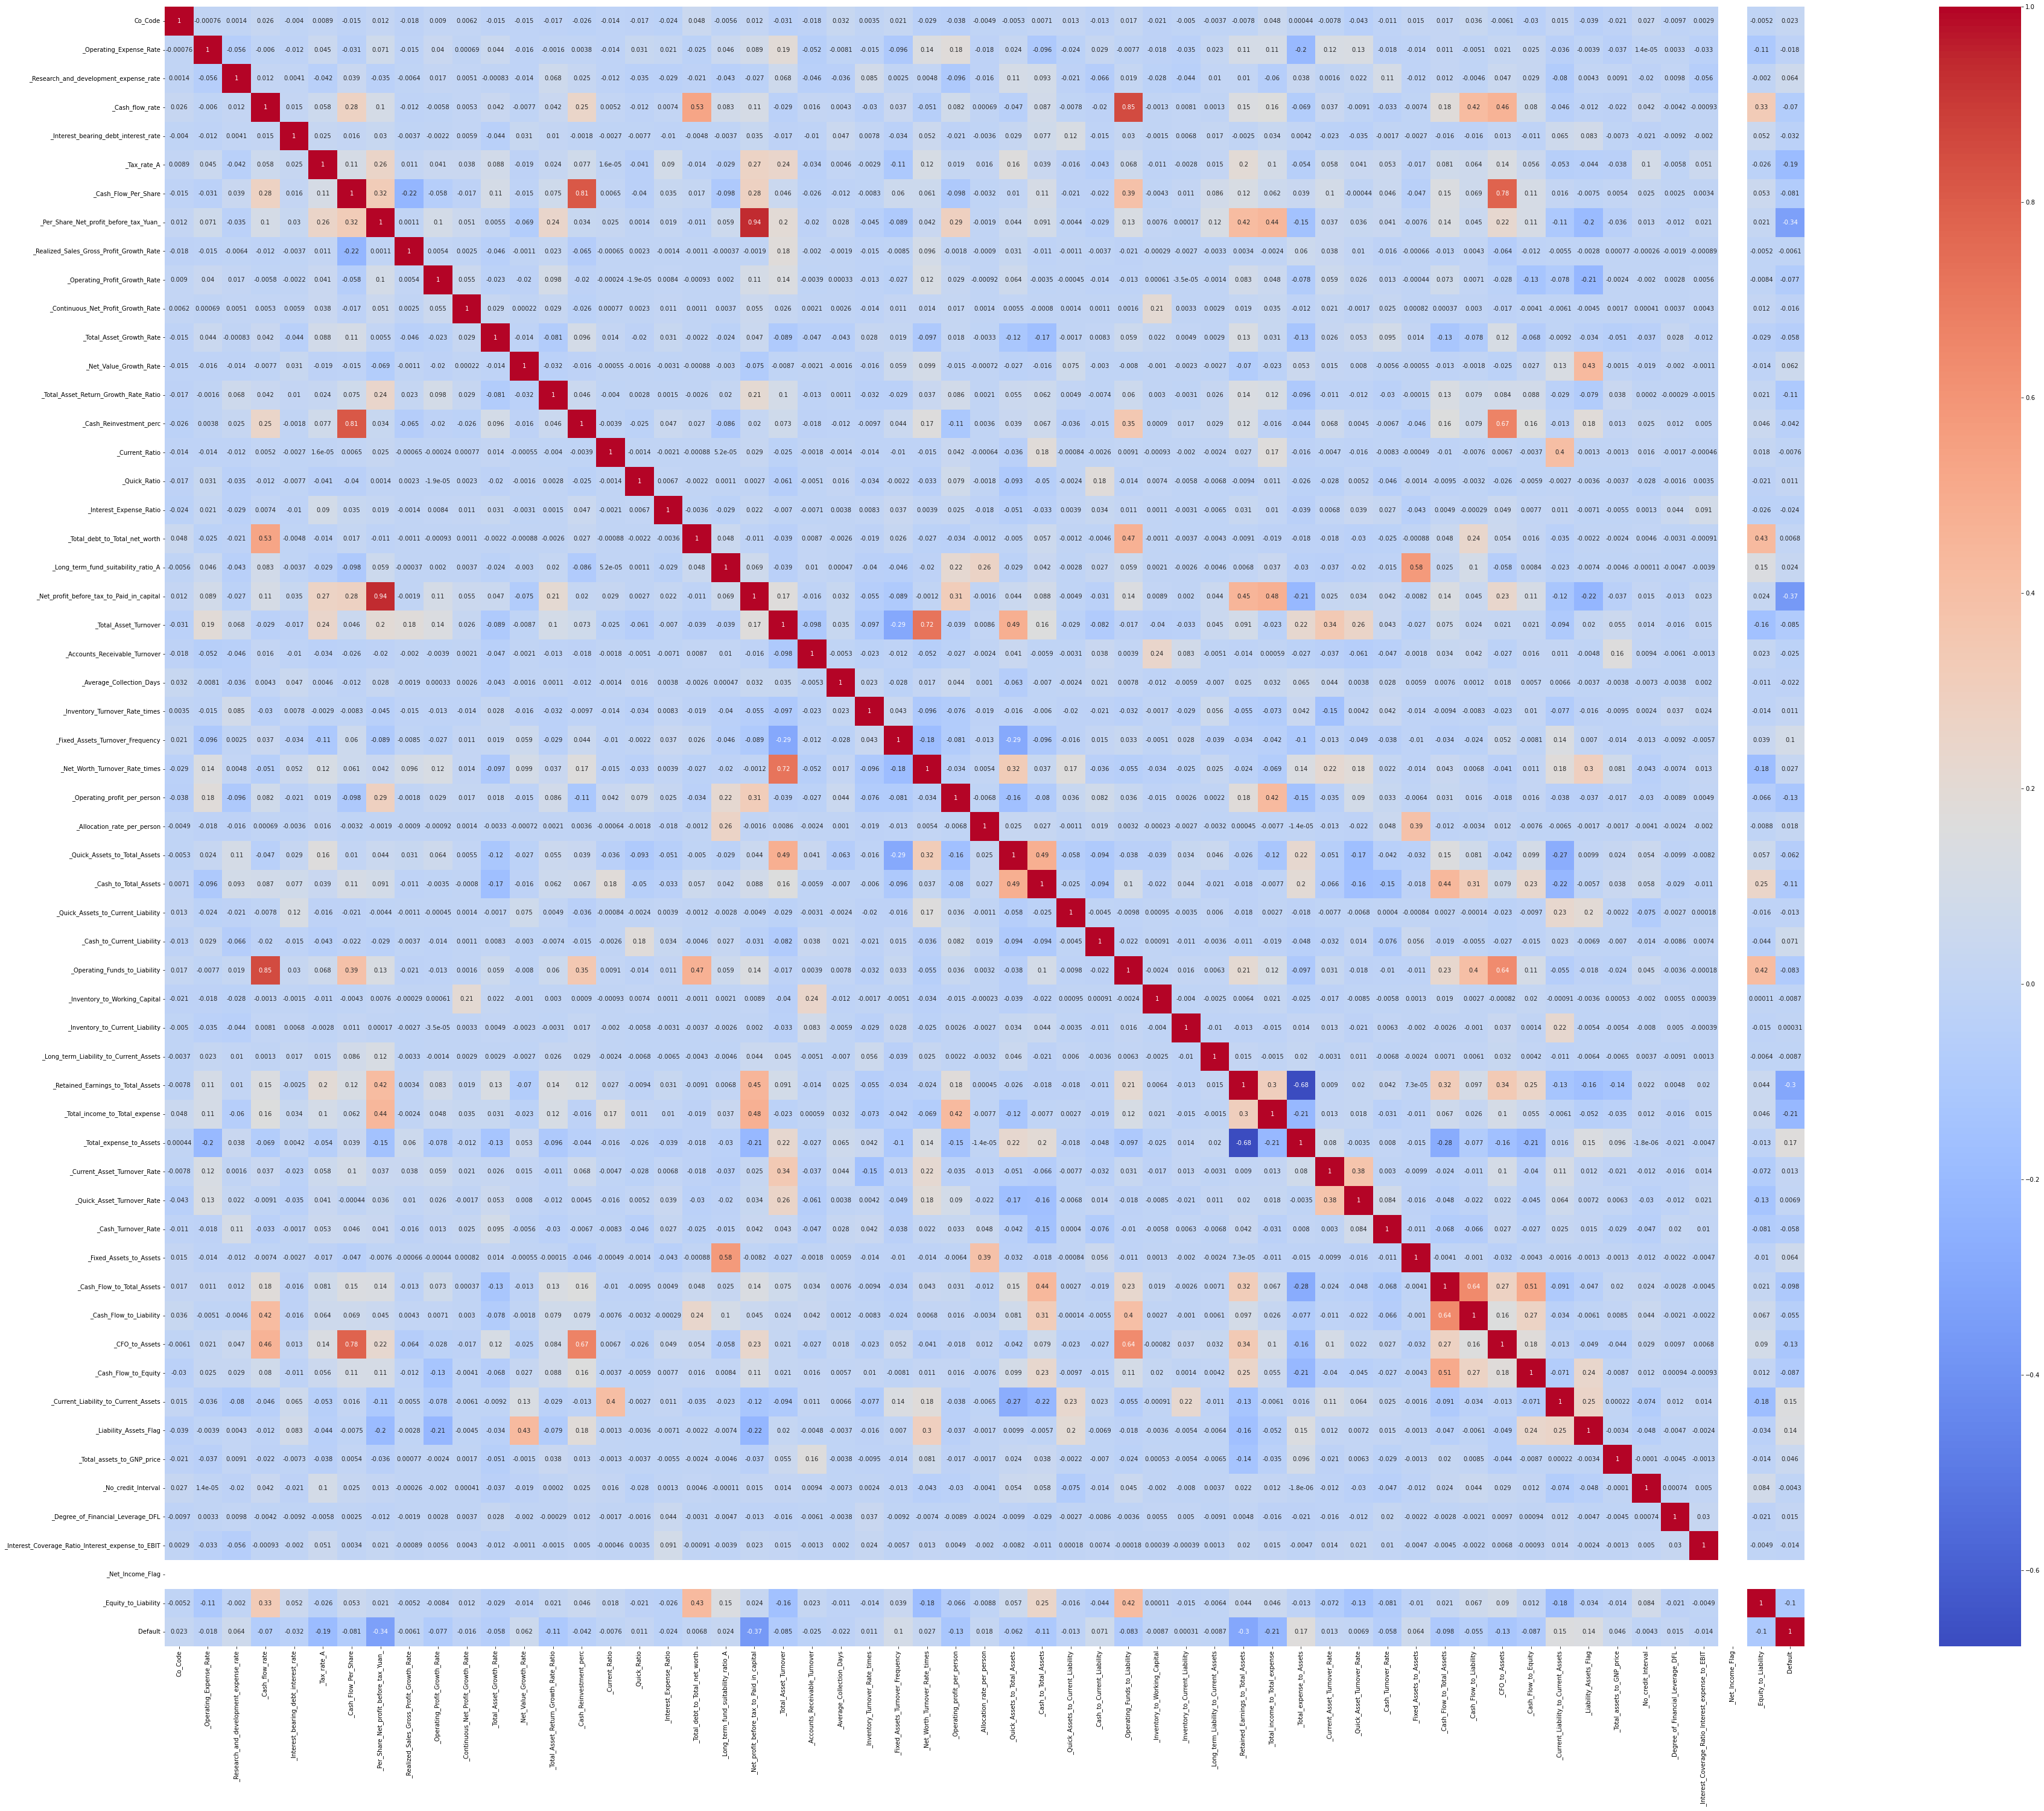

In [63]:
plt.figure(figsize=(80,50))  # setting the size of figure to 12 by 10
p=sns.heatmap(df.corr(), annot=True,cmap='coolwarm',square=True)

### PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

In [64]:
import statsmodels.formula.api as SM

In [65]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [66]:
Default_train.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_', '_Total_Asset_Growth_Rate',
       '_Total_debt_to_Total_net_worth', '_Total_Asset_Turnover',
       '_Average_Collection_Days', '_Inventory_Turnover_Rate_times',
       '_Fixed_Assets_Turnover_Frequency', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to_Total_Assets',
       '_Cash_to_Total_Assets', '_Cash_to_Current_Liability',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liability_to_Current_Assets', '_Total_expense_to_Assets',
       '_Quick_Asset_Turnover_Rate', '_Cash_Turnover_Rate',
       '_Fixed_Assets_to_Assets', '_Cash_Flow_to_Equity',
       '_Current_Liability_to_Current_Assets', '_Total_assets_to_GNP_price',
       '_Equity_to_Liability', 'Default'],
      dtype='object')

In [67]:
Default_train.describe().T

count  mean  std   min   25%   50%  \
_Operating_Expense_Rate                1378.00  0.01 1.01 -0.63 -0.63 -0.63   
_Research_and_development_expense_rate 1378.00  0.02 1.01 -0.65 -0.65 -0.65   
_Cash_flow_rate                        1378.00  0.00 1.00 -2.18 -0.58 -0.13   
_Tax_rate_A                            1378.00 -0.00 1.00 -0.82 -0.82 -0.53   
_Cash_Flow_Per_Share                   1378.00  0.00 1.02 -2.28 -0.51  0.03   
_Per_Share_Net_profit_before_tax_Yuan_ 1378.00  0.00 1.00 -2.15 -0.56 -0.05   
_Total_Asset_Growth_Rate               1378.00 -0.04 1.01 -1.82 -0.48  0.29   
_Total_debt_to_Total_net_worth         1378.00  0.01 1.01 -1.30 -0.76 -0.27   
_Total_Asset_Turnover                  1378.00  0.03 1.01 -1.48 -0.73 -0.21   
_Average_Collection_Days               1378.00  0.01 1.00 -1.63 -0.71 -0.09   
_Inventory_Turnover_Rate_times         1378.00  0.01 1.01 -0.66 -0.66 -0.65   
_Fixed_Assets_Turnover_Frequency       1378.00  0.02 1.01 -0.66 -0.63 -0.59   
_Operating_profit_per_person           1378.00  0.00 0.97 -1.91 -0.47 -0.12   
_Allocation_rate_per_person            1378.00 -0.01 1.00 -1.03 -0.75 -0.41   
_Quick_Assets_to_Total_Assets          1378.00  0.03 1.01 -1.62 -0.79 -0.14   
_Cash_to_Total_Assets                  1378.00  0.01 1.00 -1.09 -0.75 -0.34   
_Cash_to_Current_Liability             1378.00  0.01 0.99 -0.91 -0.72 -0.44   
_Inventory_to_Current_Liability        1378.00 -0.03 1.00 -1.14 -0.79 -0.31   
_Long_term_Liability_to_Current_Assets 1378.00  0.00 1.01 -0.78 -0.78 -0.49   
_Total_expense_to_Assets               1378.00  0.02 1.00 -1.32 -0.73 -0.27   
_Quick_Asset_Turnover_Rate             1378.00  0.00 1.00 -0.74 -0.74 -0.74   
_Cash_Turnover_Rate                    1378.00 -0.00 0.99 -0.94 -0.94 -0.33   
_Fixed_Assets_to_Assets                1378.00  0.02 1.01 -1.26 -0.81 -0.24   
_Cash_Flow_to_Equity                   1378.00  0.00 1.01 -1.95 -0.53 -0.02   
_Current_Liability_to_Current_Assets   1378.00  0.01 1.00 -1.91 -0.71 -0.10   
_Total_assets_to_GNP_price             1378.00 -0.02 0.99 -0.93 -0.76 -0.46   
_Equity_to_Liability                   1378.00 -0.01 0.99 -1.60 -0.76 -0.35   
Default                                1378.00  0.11 0.31  0.00  0.00  0.00   

                                        75%  max  
_Operating_Expense_Rate                0.66 2.44  
_Research_and_development_expense_rate 0.54 2.04  
_Cash_flow_rate                        0.49 2.09  
_Tax_rate_A                            0.77 3.19  
_Cash_Flow_Per_Share                   0.55 2.28  
_Per_Share_Net_profit_before_tax_Yuan_ 0.53 2.13  
_Total_Asset_Growth_Rate               0.63 1.61  
_Total_debt_to_Total_net_worth         0.54 2.47  
_Total_Asset_Turnover                  0.59 2.44  
_Average_Collection_Days               0.57 2.49  
_Inventory_Turnover_Rate_times         0.59 2.45  
_Fixed_Assets_Turnover_Frequency       1.74 1.74  
_Operating_profit_per_person           0.46 1.89  
_Allocation_rate_per_person            0.39 2.19  
_Quick_Assets_to_Total_Assets          0.73 2.90  
_Cash_to_Total_Assets                  0.46 2.29  
_Cash_to_Current_Liability             0.41 2.11  
_Inventory_to_Current_Liability        0.43 2.34  
_Long_term_Liability_to_Current_Assets 0.42 2.22  
_Total_expense_to_Assets               0.48 2.23  
_Quick_Asset_Turnover_Rate             0.93 2.15  
_Cash_Turnover_Rate                    0.67 2.60  
_Fixed_Assets_to_Assets                0.70 2.86  
_Cash_Flow_to_Equity                   0.50 1.93  
_Current_Liability_to_Current_Assets   0.51 2.35  
_Total_assets_to_GNP_price             0.38 2.15  
_Equity_to_Liability                   0.41 2.22  
Default                                0.00 1.00

In [68]:
m2= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Tax_rate_A + _Cash_Flow_Per_Share +_Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [69]:
model_2 = SM.logit(formula = m2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.198135
         Iterations 9


In [70]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4164
Time:                        21:46:47   Log-Likelihood:                -273.03
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.440e-66
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6120      0.217    -16.670      0.000      -4.037      -3.187
_Operating_Expense_Rate                    0.1554      0.132      1.180      0.238      -0.103       0.413
_Research_and_development_expense_rate     0.4398      0.117      3.764      0.000       0.211       0.669
_Cash_flow_rate                            0.0488      0.250      0.195      0.845      -0.442       0.540
_Tax_rate_A                               -0.0770      0.163     -0.473      0.636      -0.396       0.242
_Cash_Flow_Per_Share                      -0.0393      0.199     -0.197      0.843      -0.429       0.351
_Per_Share_Net_profit_before_tax_Yuan_    -1.0875      0.230     -4.724      0.000      -1.539      -0.636
_Total_Asset_Growth_Rate                  -0.0732      0.130     -0.563      0.574      -0.328       0.182
_Total_debt_to_Total_net_worth             0.5025      0.186      2.700      0.007       0.138       0.867
_Total_Asset_Turnover                     -0.2550      0.218     -1.171      0.241      -0.682       0.172
_Average_Collection_Days                   0.4120      0.138      2.980      0.003       0.141       0.683
_Inventory_Turnover_Rate_times             0.0383      0.123      0.310      0.756      -0.203       0.280
_Fixed_Assets_Turnover_Frequency           0.1612      0.146      1.103      0.270      -0.125       0.448
_Operating_profit_per_person               0.0465      0.175      0.266      0.790      -0.296       0.389
_Allocation_rate_per_person                0.0694      0.176      0.393      0.694      -0.276       0.415
_Quick_Assets_to_Total_Assets             -0.6755      0.262     -2.578      0.010      -1.189      -0.162
_Cash_to_Total_Assets                      0.0758      0.199      0.381      0.703      -0.314       0.466
_Cash_to_Current_Liability                 0.0510      0.167      0.305      0.761      -0.277       0.379
_Inventory_to_Current_Liability           -0.1017      0.208     -0.488      0.625      -0.510       0.307
_Long_term_Liability_to_Current_Assets    -0.1827      0.135     -1.348      0.178      -0.448       0.083
_Total_expense_to_Assets                   0.4416      0.165      2.681      0.007       0.119       0.764
_Quick_Asset_Turnover_Rate                -0.0274      0.136     -0.201      0.840      -0.294       0.239
_Cash_Turnover_Rate                       -0.3718      0.138     -2.704      0.007      -0.641      -0.102
_Fixed_Assets_to_Assets                   -0.1158      0.173     -0.670      0.503      -0.455       0.223
_Cash_Flow_to_Equity                      -0.1825      0.129     -1.414      0.157      -0.435       0.070
_Current_Liability_to_Current_Assets       0.1078      0.209      0.517      0.605      -0.301       0.517
_Total_assets_to_GNP_price                 0.0706      0.146      0.485      0.628      -0.215       0.356
_Equity_to_Liability           

In [71]:
#_Cash_flow_rate
Default_train1= Default_train.drop('_Cash_flow_rate', axis = 1)

In [72]:
m3= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Cash_Flow_Per_Share +_Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [73]:
model_3 = SM.logit(formula = m3, data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.198148
         Iterations 9


In [74]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1351
Method:                           MLE   Df Model:                           26
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4164
Time:                        21:46:47   Log-Likelihood:                -273.05
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.673e-66
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6150      0.217    -16.685      0.000      -4.040      -3.190
_Operating_Expense_Rate                    0.1555      0.132      1.181      0.238      -0.103       0.414
_Research_and_development_expense_rate     0.4414      0.117      3.786      0.000       0.213       0.670
_Tax_rate_A                               -0.0777      0.163     -0.477      0.633      -0.397       0.242
_Cash_Flow_Per_Share                      -0.0107      0.134     -0.080      0.936      -0.273       0.252
_Per_Share_Net_profit_before_tax_Yuan_    -1.0856      0.230     -4.725      0.000      -1.536      -0.635
_Total_Asset_Growth_Rate                  -0.0718      0.130     -0.553      0.580      -0.326       0.183
_Total_debt_to_Total_net_worth             0.5044      0.186      2.708      0.007       0.139       0.869
_Total_Asset_Turnover                     -0.2507      0.216     -1.159      0.247      -0.675       0.173
_Average_Collection_Days                   0.4114      0.138      2.976      0.003       0.140       0.682
_Inventory_Turnover_Rate_times             0.0394      0.123      0.320      0.749      -0.202       0.281
_Fixed_Assets_Turnover_Frequency           0.1598      0.146      1.094      0.274      -0.126       0.446
_Operating_profit_per_person               0.0490      0.174      0.281      0.779      -0.292       0.390
_Allocation_rate_per_person                0.0725      0.176      0.413      0.680      -0.272       0.417
_Quick_Assets_to_Total_Assets             -0.6762      0.262     -2.582      0.010      -1.189      -0.163
_Cash_to_Total_Assets                      0.0710      0.197      0.360      0.719      -0.316       0.458
_Cash_to_Current_Liability                 0.0534      0.167      0.320      0.749      -0.273       0.380
_Inventory_to_Current_Liability           -0.1033      0.209     -0.495      0.620      -0.512       0.306
_Long_term_Liability_to_Current_Assets    -0.1839      0.135     -1.359      0.174      -0.449       0.081
_Total_expense_to_Assets                   0.4400      0.164      2.677      0.007       0.118       0.762
_Quick_Asset_Turnover_Rate                -0.0269      0.136     -0.198      0.843      -0.294       0.240
_Cash_Turnover_Rate                       -0.3712      0.138     -2.699      0.007      -0.641      -0.102
_Fixed_Assets_to_Assets                   -0.1152      0.173     -0.666      0.505      -0.454       0.224
_Cash_Flow_to_Equity                      -0.1795      0.128     -1.402      0.161      -0.431       0.071
_Current_Liability_to_Current_Assets       0.1081      0.209      0.517      0.605      -0.302       0.518
_Total_assets_to_GNP_price                 0.0704      0.146      0.484      0.629      -0.215       0.356
_Equity_to_Liability                      -0.8451      0.340     -2.486      0.013      -1.511      -0.179
===============================

In [75]:
#_Cash_Flow_Per_Share
Default_train2= Default_train1.drop('_Cash_Flow_Per_Share', axis = 1)

In [76]:
m4= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [77]:
model_4 = SM.logit(formula = m4, data=Default_train2).fit()

Optimization terminated successfully.
         Current function value: 0.198151
         Iterations 9


In [78]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           25
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4164
Time:                        21:46:59   Log-Likelihood:                -273.05
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.197e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6146      0.217    -16.690      0.000      -4.039      -3.190
_Operating_Expense_Rate                    0.1551      0.132      1.178      0.239      -0.103       0.413
_Research_and_development_expense_rate     0.4409      0.116      3.787      0.000       0.213       0.669
_Tax_rate_A                               -0.0785      0.163     -0.483      0.629      -0.397       0.240
_Per_Share_Net_profit_before_tax_Yuan_    -1.0894      0.225     -4.851      0.000      -1.530      -0.649
_Total_Asset_Growth_Rate                  -0.0724      0.130     -0.558      0.577      -0.327       0.182
_Total_debt_to_Total_net_worth             0.5055      0.186      2.721      0.007       0.141       0.869
_Total_Asset_Turnover                     -0.2505      0.216     -1.157      0.247      -0.675       0.174
_Average_Collection_Days                   0.4114      0.138      2.977      0.003       0.141       0.682
_Inventory_Turnover_Rate_times             0.0401      0.123      0.326      0.744      -0.201       0.281
_Fixed_Assets_Turnover_Frequency           0.1609      0.145      1.106      0.269      -0.124       0.446
_Operating_profit_per_person               0.0504      0.173      0.291      0.771      -0.289       0.390
_Allocation_rate_per_person                0.0713      0.175      0.407      0.684      -0.272       0.414
_Quick_Assets_to_Total_Assets             -0.6775      0.261     -2.592      0.010      -1.190      -0.165
_Cash_to_Total_Assets                      0.0711      0.197      0.361      0.718      -0.316       0.458
_Cash_to_Current_Liability                 0.0540      0.167      0.324      0.746      -0.272       0.380
_Inventory_to_Current_Liability           -0.1032      0.209     -0.495      0.621      -0.512       0.305
_Long_term_Liability_to_Current_Assets    -0.1848      0.135     -1.370      0.171      -0.449       0.080
_Total_expense_to_Assets                   0.4384      0.163      2.688      0.007       0.119       0.758
_Quick_Asset_Turnover_Rate                -0.0273      0.136     -0.201      0.841      -0.294       0.239
_Cash_Turnover_Rate                       -0.3710      0.138     -2.698      0.007      -0.641      -0.101
_Fixed_Assets_to_Assets                   -0.1161      0.173     -0.673      0.501      -0.454       0.222
_Cash_Flow_to_Equity                      -0.1808      0.127     -1.423      0.155      -0.430       0.068
_Current_Liability_to_Current_Assets       0.1067      0.208      0.512      0.609      -0.302       0.515
_Total_assets_to_GNP_price                 0.0699      0.145      0.481      0.631      -0.215       0.355
_Equity_to_Liability                      -0.8460      0.340     -2.491      0.013      -1.512      -0.180
==========================================================================================================
"""

In [79]:
#_Quick_Asset_Turnover_Rate
Default_train3= Default_train2.drop('_Quick_Asset_Turnover_Rate', axis = 1)

In [80]:
m5= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [81]:
model_5 = SM.logit(formula = m5, data=Default_train3).fit()

Optimization terminated successfully.
         Current function value: 0.198165
         Iterations 9


In [82]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                           24
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4163
Time:                        21:47:00   Log-Likelihood:                -273.07
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.048e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6159      0.217    -16.693      0.000      -4.040      -3.191
_Operating_Expense_Rate                    0.1538      0.131      1.170      0.242      -0.104       0.411
_Research_and_development_expense_rate     0.4392      0.116      3.782      0.000       0.212       0.667
_Tax_rate_A                               -0.0796      0.163     -0.489      0.625      -0.398       0.239
_Per_Share_Net_profit_before_tax_Yuan_    -1.0907      0.225     -4.854      0.000      -1.531      -0.650
_Total_Asset_Growth_Rate                  -0.0728      0.130     -0.561      0.575      -0.327       0.182
_Total_debt_to_Total_net_worth             0.5008      0.184      2.717      0.007       0.139       0.862
_Total_Asset_Turnover                     -0.2625      0.208     -1.261      0.207      -0.670       0.146
_Average_Collection_Days                   0.4167      0.136      3.069      0.002       0.151       0.683
_Inventory_Turnover_Rate_times             0.0383      0.123      0.312      0.755      -0.202       0.279
_Fixed_Assets_Turnover_Frequency           0.1597      0.145      1.099      0.272      -0.125       0.445
_Operating_profit_per_person               0.0510      0.173      0.295      0.768      -0.288       0.390
_Allocation_rate_per_person                0.0688      0.175      0.394      0.694      -0.274       0.411
_Quick_Assets_to_Total_Assets             -0.6694      0.258     -2.591      0.010      -1.176      -0.163
_Cash_to_Total_Assets                      0.0736      0.197      0.374      0.709      -0.312       0.460
_Cash_to_Current_Liability                 0.0538      0.167      0.323      0.747      -0.273       0.380
_Inventory_to_Current_Liability           -0.1023      0.209     -0.490      0.624      -0.511       0.306
_Long_term_Liability_to_Current_Assets    -0.1862      0.135     -1.382      0.167      -0.450       0.078
_Total_expense_to_Assets                   0.4353      0.162      2.681      0.007       0.117       0.754
_Cash_Turnover_Rate                       -0.3729      0.137     -2.715      0.007      -0.642      -0.104
_Fixed_Assets_to_Assets                   -0.1133      0.172     -0.659      0.510      -0.450       0.224
_Cash_Flow_to_Equity                      -0.1813      0.127     -1.428      0.153      -0.430       0.068
_Current_Liability_to_Current_Assets       0.1064      0.208      0.511      0.610      -0.302       0.515
_Total_assets_to_GNP_price                 0.0708      0.145      0.487      0.626      -0.214       0.356
_Equity_to_Liability                      -0.8503      0.339     -2.506      0.012      -1.515      -0.185
==========================================================================================================
"""

In [83]:
#_Operating_profit_per_person
Default_train4= Default_train3.drop('_Operating_profit_per_person', axis = 1)

In [84]:
m6= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [85]:
model_6 = SM.logit(formula = m6, data=Default_train4).fit()

Optimization terminated successfully.
         Current function value: 0.198197
         Iterations 9


In [86]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1354
Method:                           MLE   Df Model:                           23
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4162
Time:                        21:47:02   Log-Likelihood:                -273.12
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.617e-68
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6140      0.216    -16.721      0.000      -4.038      -3.190
_Operating_Expense_Rate                    0.1598      0.130      1.230      0.219      -0.095       0.414
_Research_and_development_expense_rate     0.4406      0.116      3.801      0.000       0.213       0.668
_Tax_rate_A                               -0.0739      0.161     -0.458      0.647      -0.390       0.242
_Per_Share_Net_profit_before_tax_Yuan_    -1.0552      0.189     -5.592      0.000      -1.425      -0.685
_Total_Asset_Growth_Rate                  -0.0729      0.130     -0.562      0.574      -0.327       0.181
_Total_debt_to_Total_net_worth             0.5032      0.184      2.736      0.006       0.143       0.864
_Total_Asset_Turnover                     -0.2692      0.207     -1.302      0.193      -0.674       0.136
_Average_Collection_Days                   0.4104      0.134      3.064      0.002       0.148       0.673
_Inventory_Turnover_Rate_times             0.0360      0.122      0.294      0.769      -0.204       0.276
_Fixed_Assets_Turnover_Frequency           0.1578      0.145      1.087      0.277      -0.127       0.442
_Allocation_rate_per_person                0.0637      0.174      0.366      0.714      -0.277       0.405
_Quick_Assets_to_Total_Assets             -0.6687      0.258     -2.589      0.010      -1.175      -0.162
_Cash_to_Total_Assets                      0.0709      0.197      0.360      0.719      -0.315       0.457
_Cash_to_Current_Liability                 0.0536      0.167      0.321      0.748      -0.273       0.381
_Inventory_to_Current_Liability           -0.1004      0.208     -0.482      0.630      -0.509       0.308
_Long_term_Liability_to_Current_Assets    -0.1890      0.134     -1.408      0.159      -0.452       0.074
_Total_expense_to_Assets                   0.4376      0.162      2.705      0.007       0.121       0.755
_Cash_Turnover_Rate                       -0.3698      0.137     -2.705      0.007      -0.638      -0.102
_Fixed_Assets_to_Assets                   -0.1109      0.172     -0.646      0.518      -0.447       0.226
_Cash_Flow_to_Equity                      -0.1808      0.127     -1.424      0.154      -0.430       0.068
_Current_Liability_to_Current_Assets       0.1029      0.208      0.495      0.621      -0.305       0.511
_Total_assets_to_GNP_price                 0.0744      0.145      0.515      0.607      -0.209       0.358
_Equity_to_Liability                      -0.8550      0.338     -2.527      0.012      -1.518      -0.192
==========================================================================================================
"""

In [87]:
#_Cash_to_Current_Liability
Default_train5= Default_train4.drop('_Cash_to_Current_Liability', axis = 1)

In [88]:
m7= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [89]:
model_7 = SM.logit(formula = m7, data=Default_train5).fit()

Optimization terminated successfully.
         Current function value: 0.198234
         Iterations 9


In [90]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                           22
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4161
Time:                        21:47:04   Log-Likelihood:                -273.17
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.440e-69
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6198      0.216    -16.766      0.000      -4.043      -3.197
_Operating_Expense_Rate                    0.1598      0.130      1.230      0.219      -0.095       0.414
_Research_and_development_expense_rate     0.4381      0.116      3.786      0.000       0.211       0.665
_Tax_rate_A                               -0.0734      0.161     -0.455      0.649      -0.390       0.243
_Per_Share_Net_profit_before_tax_Yuan_    -1.0591      0.188     -5.621      0.000      -1.428      -0.690
_Total_Asset_Growth_Rate                  -0.0725      0.130     -0.559      0.576      -0.327       0.182
_Total_debt_to_Total_net_worth             0.5094      0.183      2.784      0.005       0.151       0.868
_Total_Asset_Turnover                     -0.2699      0.207     -1.305      0.192      -0.675       0.135
_Average_Collection_Days                   0.4172      0.132      3.158      0.002       0.158       0.676
_Inventory_Turnover_Rate_times             0.0336      0.122      0.275      0.783      -0.206       0.273
_Fixed_Assets_Turnover_Frequency           0.1574      0.145      1.085      0.278      -0.127       0.442
_Allocation_rate_per_person                0.0716      0.172      0.416      0.677      -0.265       0.409
_Quick_Assets_to_Total_Assets             -0.6793      0.256     -2.651      0.008      -1.181      -0.177
_Cash_to_Total_Assets                      0.0975      0.179      0.545      0.586      -0.253       0.448
_Inventory_to_Current_Liability           -0.1010      0.209     -0.484      0.628      -0.510       0.308
_Long_term_Liability_to_Current_Assets    -0.1894      0.134     -1.411      0.158      -0.453       0.074
_Total_expense_to_Assets                   0.4399      0.162      2.722      0.006       0.123       0.757
_Cash_Turnover_Rate                       -0.3774      0.135     -2.802      0.005      -0.641      -0.113
_Fixed_Assets_to_Assets                   -0.1098      0.171     -0.641      0.522      -0.446       0.226
_Cash_Flow_to_Equity                      -0.1820      0.127     -1.433      0.152      -0.431       0.067
_Current_Liability_to_Current_Assets       0.0911      0.205      0.444      0.657      -0.311       0.493
_Total_assets_to_GNP_price                 0.0728      0.144      0.504      0.614      -0.210       0.356
_Equity_to_Liability                      -0.8402      0.335     -2.506      0.012      -1.497      -0.183
==========================================================================================================
"""

In [91]:
#_Inventory_Turnover_Rate_times
Default_train6= Default_train5.drop('_Inventory_Turnover_Rate_times', axis = 1)

In [92]:
m8= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [93]:
model_8 = SM.logit(formula = m8, data=Default_train6).fit()

Optimization terminated successfully.
         Current function value: 0.198262
         Iterations 9


In [94]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1356
Method:                           MLE   Df Model:                           21
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4160
Time:                        21:47:06   Log-Likelihood:                -273.20
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.528e-69
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6190      0.216    -16.767      0.000      -4.042      -3.196
_Operating_Expense_Rate                    0.1617      0.130      1.246      0.213      -0.093       0.416
_Research_and_development_expense_rate     0.4411      0.115      3.827      0.000       0.215       0.667
_Tax_rate_A                               -0.0712      0.161     -0.442      0.658      -0.387       0.244
_Per_Share_Net_profit_before_tax_Yuan_    -1.0611      0.188     -5.632      0.000      -1.430      -0.692
_Total_Asset_Growth_Rate                  -0.0722      0.130     -0.557      0.578      -0.326       0.182
_Total_debt_to_Total_net_worth             0.5037      0.182      2.771      0.006       0.147       0.860
_Total_Asset_Turnover                     -0.2734      0.206     -1.324      0.185      -0.678       0.131
_Average_Collection_Days                   0.4189      0.132      3.173      0.002       0.160       0.678
_Fixed_Assets_Turnover_Frequency           0.1557      0.145      1.075      0.282      -0.128       0.440
_Allocation_rate_per_person                0.0656      0.170      0.385      0.700      -0.268       0.399
_Quick_Assets_to_Total_Assets             -0.6806      0.256     -2.655      0.008      -1.183      -0.178
_Cash_to_Total_Assets                      0.0968      0.179      0.541      0.589      -0.254       0.447
_Inventory_to_Current_Liability           -0.0968      0.208     -0.466      0.641      -0.504       0.310
_Long_term_Liability_to_Current_Assets    -0.1879      0.134     -1.401      0.161      -0.451       0.075
_Total_expense_to_Assets                   0.4387      0.162      2.712      0.007       0.122       0.756
_Cash_Turnover_Rate                       -0.3771      0.135     -2.799      0.005      -0.641      -0.113
_Fixed_Assets_to_Assets                   -0.1046      0.170     -0.614      0.539      -0.438       0.229
_Cash_Flow_to_Equity                      -0.1806      0.127     -1.423      0.155      -0.429       0.068
_Current_Liability_to_Current_Assets       0.0872      0.204      0.427      0.669      -0.313       0.487
_Total_assets_to_GNP_price                 0.0700      0.144      0.486      0.627      -0.212       0.352
_Equity_to_Liability                      -0.8498      0.334     -2.545      0.011      -1.504      -0.195
==========================================================================================================
"""

In [95]:
#_Allocation_rate_per_person
Default_train7= Default_train6.drop('_Allocation_rate_per_person', axis = 1)

In [96]:
m9= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [97]:
model_9 = SM.logit(formula = m9, data=Default_train7).fit()

Optimization terminated successfully.
         Current function value: 0.198315
         Iterations 9


In [98]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           20
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4159
Time:                        21:47:08   Log-Likelihood:                -273.28
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.661e-70
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6206      0.216    -16.766      0.000      -4.044      -3.197
_Operating_Expense_Rate                    0.1609      0.130      1.239      0.215      -0.094       0.415
_Research_and_development_expense_rate     0.4343      0.114      3.813      0.000       0.211       0.658
_Tax_rate_A                               -0.0703      0.161     -0.437      0.662      -0.386       0.245
_Per_Share_Net_profit_before_tax_Yuan_    -1.0656      0.188     -5.665      0.000      -1.434      -0.697
_Total_Asset_Growth_Rate                  -0.0715      0.130     -0.552      0.581      -0.325       0.182
_Total_debt_to_Total_net_worth             0.5122      0.181      2.835      0.005       0.158       0.866
_Total_Asset_Turnover                     -0.2874      0.203     -1.414      0.157      -0.686       0.111
_Average_Collection_Days                   0.4159      0.132      3.150      0.002       0.157       0.675
_Fixed_Assets_Turnover_Frequency           0.1663      0.142      1.173      0.241      -0.111       0.444
_Quick_Assets_to_Total_Assets             -0.6887      0.256     -2.694      0.007      -1.190      -0.188
_Cash_to_Total_Assets                      0.0942      0.179      0.527      0.598      -0.256       0.445
_Inventory_to_Current_Liability           -0.0945      0.208     -0.455      0.649      -0.502       0.313
_Long_term_Liability_to_Current_Assets    -0.1941      0.133     -1.460      0.144      -0.455       0.067
_Total_expense_to_Assets                   0.4248      0.157      2.699      0.007       0.116       0.733
_Cash_Turnover_Rate                       -0.3783      0.135     -2.808      0.005      -0.642      -0.114
_Fixed_Assets_to_Assets                   -0.0922      0.167     -0.552      0.581      -0.420       0.235
_Cash_Flow_to_Equity                      -0.1781      0.127     -1.405      0.160      -0.427       0.070
_Current_Liability_to_Current_Assets       0.0822      0.204      0.403      0.687      -0.317       0.482
_Total_assets_to_GNP_price                 0.0936      0.130      0.719      0.472      -0.162       0.349
_Equity_to_Liability                      -0.8522      0.334     -2.548      0.011      -1.508      -0.197
==========================================================================================================
"""

In [99]:
#_Current_Liability_to_Current_Assets
Default_train8= Default_train7.drop('_Current_Liability_to_Current_Assets', axis = 1)

In [100]:
m10= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [101]:
model_10 = SM.logit(formula = m10, data=Default_train8).fit()

Optimization terminated successfully.
         Current function value: 0.198374
         Iterations 9


In [102]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                           19
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4157
Time:                        21:47:09   Log-Likelihood:                -273.36
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.604e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6287      0.216    -16.828      0.000      -4.051      -3.206
_Operating_Expense_Rate                    0.1618      0.130      1.246      0.213      -0.093       0.416
_Research_and_development_expense_rate     0.4301      0.113      3.794      0.000       0.208       0.652
_Tax_rate_A                               -0.0683      0.161     -0.424      0.672      -0.384       0.248
_Per_Share_Net_profit_before_tax_Yuan_    -1.0777      0.186     -5.791      0.000      -1.442      -0.713
_Total_Asset_Growth_Rate                  -0.0696      0.129     -0.538      0.591      -0.323       0.184
_Total_debt_to_Total_net_worth             0.5292      0.175      3.020      0.003       0.186       0.873
_Total_Asset_Turnover                     -0.2891      0.204     -1.419      0.156      -0.688       0.110
_Average_Collection_Days                   0.4136      0.132      3.134      0.002       0.155       0.672
_Fixed_Assets_Turnover_Frequency           0.1694      0.141      1.198      0.231      -0.108       0.447
_Quick_Assets_to_Total_Assets             -0.7363      0.229     -3.218      0.001      -1.185      -0.288
_Cash_to_Total_Assets                      0.0888      0.178      0.498      0.618      -0.261       0.438
_Inventory_to_Current_Liability           -0.1447      0.168     -0.860      0.390      -0.475       0.185
_Long_term_Liability_to_Current_Assets    -0.2028      0.131     -1.543      0.123      -0.461       0.055
_Total_expense_to_Assets                   0.4299      0.157      2.739      0.006       0.122       0.737
_Cash_Turnover_Rate                       -0.3764      0.134     -2.800      0.005      -0.640      -0.113
_Fixed_Assets_to_Assets                   -0.0803      0.165     -0.487      0.626      -0.404       0.243
_Cash_Flow_to_Equity                      -0.1746      0.127     -1.380      0.168      -0.423       0.073
_Total_assets_to_GNP_price                 0.0895      0.130      0.689      0.491      -0.165       0.344
_Equity_to_Liability                      -0.8874      0.323     -2.745      0.006      -1.521      -0.254
==========================================================================================================
"""

In [103]:
#_Tax_rate_A
Default_train9= Default_train8.drop('_Tax_rate_A', axis = 1)

In [104]:
m11= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [105]:
model_11 = SM.logit(formula = m11, data=Default_train9).fit()

Optimization terminated successfully.
         Current function value: 0.198441
         Iterations 9


In [106]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4155
Time:                        21:47:11   Log-Likelihood:                -273.45
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.990e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6253      0.215    -16.857      0.000      -4.047      -3.204
_Operating_Expense_Rate                    0.1671      0.129      1.293      0.196      -0.086       0.420
_Research_and_development_expense_rate     0.4338      0.113      3.835      0.000       0.212       0.655
_Per_Share_Net_profit_before_tax_Yuan_    -1.1084      0.173     -6.424      0.000      -1.447      -0.770
_Total_Asset_Growth_Rate                  -0.0703      0.129     -0.543      0.587      -0.324       0.183
_Total_debt_to_Total_net_worth             0.5323      0.175      3.037      0.002       0.189       0.876
_Total_Asset_Turnover                     -0.2975      0.203     -1.465      0.143      -0.695       0.100
_Average_Collection_Days                   0.4136      0.132      3.128      0.002       0.154       0.673
_Fixed_Assets_Turnover_Frequency           0.1724      0.141      1.221      0.222      -0.104       0.449
_Quick_Assets_to_Total_Assets             -0.7419      0.229     -3.239      0.001      -1.191      -0.293
_Cash_to_Total_Assets                      0.0898      0.178      0.503      0.615      -0.260       0.439
_Inventory_to_Current_Liability           -0.1433      0.169     -0.850      0.395      -0.474       0.187
_Long_term_Liability_to_Current_Assets    -0.2015      0.131     -1.533      0.125      -0.459       0.056
_Total_expense_to_Assets                   0.4308      0.157      2.742      0.006       0.123       0.739
_Cash_Turnover_Rate                       -0.3780      0.134     -2.811      0.005      -0.642      -0.114
_Fixed_Assets_to_Assets                   -0.0858      0.165     -0.521      0.602      -0.408       0.237
_Cash_Flow_to_Equity                      -0.1740      0.127     -1.371      0.170      -0.423       0.075
_Total_assets_to_GNP_price                 0.0863      0.130      0.666      0.505      -0.168       0.340
_Equity_to_Liability                      -0.8861      0.323     -2.740      0.006      -1.520      -0.252
==========================================================================================================
"""

In [107]:
#_Cash_to_Total_Assets
Default_train10= Default_train9.drop('_Cash_to_Total_Assets', axis = 1)

In [108]:
m12= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [109]:
model_12 = SM.logit(formula = m12, data=Default_train10).fit()

Optimization terminated successfully.
         Current function value: 0.198533
         Iterations 9


In [110]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4152
Time:                        21:47:15   Log-Likelihood:                -273.58
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.616e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6219      0.214    -16.888      0.000      -4.042      -3.202
_Operating_Expense_Rate                    0.1630      0.129      1.263      0.207      -0.090       0.416
_Research_and_development_expense_rate     0.4388      0.113      3.894      0.000       0.218       0.660
_Per_Share_Net_profit_before_tax_Yuan_    -1.1126      0.173     -6.441      0.000      -1.451      -0.774
_Total_Asset_Growth_Rate                  -0.0759      0.129     -0.588      0.557      -0.329       0.177
_Total_debt_to_Total_net_worth             0.5250      0.175      3.008      0.003       0.183       0.867
_Total_Asset_Turnover                     -0.2932      0.203     -1.441      0.150      -0.692       0.106
_Average_Collection_Days                   0.4019      0.131      3.080      0.002       0.146       0.658
_Fixed_Assets_Turnover_Frequency           0.1736      0.141      1.232      0.218      -0.102       0.450
_Quick_Assets_to_Total_Assets             -0.7045      0.217     -3.248      0.001      -1.130      -0.279
_Inventory_to_Current_Liability           -0.1360      0.168     -0.811      0.417      -0.464       0.192
_Long_term_Liability_to_Current_Assets    -0.1981      0.131     -1.513      0.130      -0.455       0.058
_Total_expense_to_Assets                   0.4368      0.157      2.787      0.005       0.130       0.744
_Cash_Turnover_Rate                       -0.3730      0.134     -2.779      0.005      -0.636      -0.110
_Fixed_Assets_to_Assets                   -0.0824      0.164     -0.503      0.615      -0.404       0.239
_Cash_Flow_to_Equity                      -0.1527      0.121     -1.267      0.205      -0.389       0.084
_Total_assets_to_GNP_price                 0.0868      0.129      0.671      0.502      -0.167       0.341
_Equity_to_Liability                      -0.8571      0.317     -2.706      0.007      -1.478      -0.236
==========================================================================================================
"""

In [111]:
#_Fixed_Assets_to_Assets
Default_train11= Default_train10.drop('_Fixed_Assets_to_Assets', axis = 1)

In [112]:
m13= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [113]:
model_13 = SM.logit(formula = m13, data=Default_train11).fit()

Optimization terminated successfully.
         Current function value: 0.198624
         Iterations 9


In [114]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4150
Time:                        21:47:16   Log-Likelihood:                -273.70
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.039e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6172      0.214    -16.923      0.000      -4.036      -3.198
_Operating_Expense_Rate                    0.1643      0.129      1.273      0.203      -0.089       0.417
_Research_and_development_expense_rate     0.4397      0.113      3.906      0.000       0.219       0.660
_Per_Share_Net_profit_before_tax_Yuan_    -1.1090      0.173     -6.426      0.000      -1.447      -0.771
_Total_Asset_Growth_Rate                  -0.0771      0.129     -0.598      0.550      -0.330       0.176
_Total_debt_to_Total_net_worth             0.5218      0.175      2.989      0.003       0.180       0.864
_Total_Asset_Turnover                     -0.2978      0.204     -1.461      0.144      -0.697       0.102
_Average_Collection_Days                   0.4016      0.131      3.063      0.002       0.145       0.659
_Fixed_Assets_Turnover_Frequency           0.1420      0.126      1.123      0.262      -0.106       0.390
_Quick_Assets_to_Total_Assets             -0.6668      0.203     -3.277      0.001      -1.066      -0.268
_Inventory_to_Current_Liability           -0.1094      0.159     -0.690      0.490      -0.420       0.201
_Long_term_Liability_to_Current_Assets    -0.2148      0.127     -1.693      0.090      -0.464       0.034
_Total_expense_to_Assets                   0.4417      0.156      2.827      0.005       0.135       0.748
_Cash_Turnover_Rate                       -0.3715      0.134     -2.769      0.006      -0.634      -0.108
_Cash_Flow_to_Equity                      -0.1549      0.120     -1.286      0.199      -0.391       0.081
_Total_assets_to_GNP_price                 0.1024      0.126      0.816      0.415      -0.144       0.348
_Equity_to_Liability                      -0.8609      0.317     -2.714      0.007      -1.483      -0.239
==========================================================================================================
"""

In [115]:
#_Total_Asset_Growth_Rate
Default_train12= Default_train11.drop('_Total_Asset_Growth_Rate', axis = 1)

In [116]:
m14= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [117]:
model_14 = SM.logit(formula = m14, data=Default_train12).fit()

Optimization terminated successfully.
         Current function value: 0.198753
         Iterations 9


In [118]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4146
Time:                        21:47:18   Log-Likelihood:                -273.88
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.376e-73
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6138      0.213    -16.928      0.000      -4.032      -3.195
_Operating_Expense_Rate                    0.1664      0.129      1.289      0.197      -0.087       0.419
_Research_and_development_expense_rate     0.4358      0.112      3.885      0.000       0.216       0.656
_Per_Share_Net_profit_before_tax_Yuan_    -1.1170      0.173     -6.458      0.000      -1.456      -0.778
_Total_debt_to_Total_net_worth             0.5232      0.175      2.989      0.003       0.180       0.866
_Total_Asset_Turnover                     -0.2969      0.204     -1.453      0.146      -0.697       0.104
_Average_Collection_Days                   0.4034      0.132      3.066      0.002       0.146       0.661
_Fixed_Assets_Turnover_Frequency           0.1470      0.126      1.166      0.244      -0.100       0.394
_Quick_Assets_to_Total_Assets             -0.6613      0.204     -3.247      0.001      -1.060      -0.262
_Inventory_to_Current_Liability           -0.1076      0.159     -0.678      0.498      -0.419       0.203
_Long_term_Liability_to_Current_Assets    -0.2155      0.127     -1.699      0.089      -0.464       0.033
_Total_expense_to_Assets                   0.4463      0.156      2.864      0.004       0.141       0.752
_Cash_Turnover_Rate                       -0.3678      0.134     -2.746      0.006      -0.630      -0.105
_Cash_Flow_to_Equity                      -0.1506      0.120     -1.251      0.211      -0.387       0.085
_Total_assets_to_GNP_price                 0.0965      0.125      0.770      0.441      -0.149       0.342
_Equity_to_Liability                      -0.8565      0.317     -2.701      0.007      -1.478      -0.235
==========================================================================================================
"""

In [119]:
#_Inventory_to_Current_Liability
Default_train13= Default_train12.drop('_Inventory_to_Current_Liability', axis = 1)

In [120]:
m15= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [121]:
model_15 = SM.logit(formula = m15, data=Default_train13).fit()

Optimization terminated successfully.
         Current function value: 0.198922
         Iterations 9


In [122]:
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4141
Time:                        21:47:20   Log-Likelihood:                -274.11
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.541e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6140      0.213    -16.950      0.000      -4.032      -3.196
_Operating_Expense_Rate                    0.1739      0.128      1.353      0.176      -0.078       0.426
_Research_and_development_expense_rate     0.4406      0.112      3.934      0.000       0.221       0.660
_Per_Share_Net_profit_before_tax_Yuan_    -1.1266      0.172     -6.533      0.000      -1.465      -0.789
_Total_debt_to_Total_net_worth             0.5195      0.175      2.971      0.003       0.177       0.862
_Total_Asset_Turnover                     -0.2888      0.204     -1.419      0.156      -0.688       0.110
_Average_Collection_Days                   0.4130      0.130      3.167      0.002       0.157       0.669
_Fixed_Assets_Turnover_Frequency           0.1667      0.122      1.361      0.174      -0.073       0.407
_Quick_Assets_to_Total_Assets             -0.6250      0.196     -3.194      0.001      -1.008      -0.242
_Long_term_Liability_to_Current_Assets    -0.1929      0.122     -1.579      0.114      -0.432       0.047
_Total_expense_to_Assets                   0.4586      0.155      2.961      0.003       0.155       0.762
_Cash_Turnover_Rate                       -0.3720      0.134     -2.785      0.005      -0.634      -0.110
_Cash_Flow_to_Equity                      -0.1568      0.120     -1.309      0.190      -0.392       0.078
_Total_assets_to_GNP_price                 0.0939      0.125      0.749      0.454      -0.152       0.339
_Equity_to_Liability                      -0.8693      0.316     -2.755      0.006      -1.488      -0.251
==========================================================================================================
"""

In [123]:
#_Total_assets_to_GNP_price
Default_train14= Default_train13.drop('_Total_assets_to_GNP_price', axis = 1)

In [124]:
m16= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Equity_to_Liability'

In [125]:
model_16 = SM.logit(formula = m16, data=Default_train14).fit()

Optimization terminated successfully.
         Current function value: 0.199124
         Iterations 9


In [126]:
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4135
Time:                        21:47:22   Log-Likelihood:                -274.39
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.302e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6216      0.214    -16.959      0.000      -4.040      -3.203
_Operating_Expense_Rate                    0.1933      0.126      1.537      0.124      -0.053       0.440
_Research_and_development_expense_rate     0.4376      0.112      3.912      0.000       0.218       0.657
_Per_Share_Net_profit_before_tax_Yuan_    -1.1373      0.172     -6.596      0.000      -1.475      -0.799
_Total_debt_to_Total_net_worth             0.5216      0.175      2.986      0.003       0.179       0.864
_Total_Asset_Turnover                     -0.3130      0.202     -1.552      0.121      -0.708       0.082
_Average_Collection_Days                   0.4042      0.130      3.099      0.002       0.149       0.660
_Fixed_Assets_Turnover_Frequency           0.1606      0.122      1.314      0.189      -0.079       0.400
_Quick_Assets_to_Total_Assets             -0.6304      0.196     -3.212      0.001      -1.015      -0.246
_Long_term_Liability_to_Current_Assets    -0.1812      0.121     -1.497      0.135      -0.418       0.056
_Total_expense_to_Assets                   0.4336      0.151      2.867      0.004       0.137       0.730
_Cash_Turnover_Rate                       -0.3691      0.133     -2.771      0.006      -0.630      -0.108
_Cash_Flow_to_Equity                      -0.1533      0.119     -1.287      0.198      -0.387       0.080
_Equity_to_Liability                      -0.8811      0.316     -2.792      0.005      -1.500      -0.263
==========================================================================================================
"""

In [127]:
#_Cash_Flow_to_Equity
Default_train15= Default_train14.drop('_Cash_Flow_to_Equity', axis = 1)

In [128]:
m17= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'

In [129]:
model_17 = SM.logit(formula = m17, data=Default_train15).fit()

Optimization terminated successfully.
         Current function value: 0.199727
         Iterations 9


In [130]:
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4117
Time:                        21:47:23   Log-Likelihood:                -275.22
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.036e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6151      0.213    -16.967      0.000      -4.033      -3.198
_Operating_Expense_Rate                    0.1984      0.125      1.581      0.114      -0.047       0.444
_Research_and_development_expense_rate     0.4300      0.111      3.857      0.000       0.212       0.648
_Per_Share_Net_profit_before_tax_Yuan_    -1.1693      0.171     -6.826      0.000      -1.505      -0.834
_Total_debt_to_Total_net_worth             0.5324      0.174      3.063      0.002       0.192       0.873
_Total_Asset_Turnover                     -0.2815      0.199     -1.413      0.158      -0.672       0.109
_Average_Collection_Days                   0.4269      0.128      3.334      0.001       0.176       0.678
_Fixed_Assets_Turnover_Frequency           0.1589      0.122      1.300      0.194      -0.081       0.399
_Quick_Assets_to_Total_Assets             -0.6724      0.192     -3.498      0.000      -1.049      -0.296
_Long_term_Liability_to_Current_Assets    -0.1799      0.121     -1.487      0.137      -0.417       0.057
_Total_expense_to_Assets                   0.4318      0.151      2.859      0.004       0.136       0.728
_Cash_Turnover_Rate                       -0.3671      0.132     -2.778      0.005      -0.626      -0.108
_Equity_to_Liability                      -0.8645      0.313     -2.759      0.006      -1.479      -0.250
==========================================================================================================
"""

In [131]:
#_Fixed_Assets_Turnover_Frequency
Default_train16= Default_train15.drop('_Fixed_Assets_Turnover_Frequency', axis = 1)

In [132]:
m18= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'

In [133]:
model_18 = SM.logit(formula = m18, data=Default_train16).fit()

Optimization terminated successfully.
         Current function value: 0.200339
         Iterations 9


In [134]:
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4099
Time:                        21:47:25   Log-Likelihood:                -276.07
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.890e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6106      0.213    -16.942      0.000      -4.028      -3.193
_Operating_Expense_Rate                    0.1904      0.125      1.526      0.127      -0.054       0.435
_Research_and_development_expense_rate     0.4359      0.111      3.911      0.000       0.217       0.654
_Per_Share_Net_profit_before_tax_Yuan_    -1.2092      0.170     -7.131      0.000      -1.542      -0.877
_Total_debt_to_Total_net_worth             0.5370      0.174      3.090      0.002       0.196       0.878
_Total_Asset_Turnover                     -0.3199      0.198     -1.612      0.107      -0.709       0.069
_Average_Collection_Days                   0.4319      0.128      3.385      0.001       0.182       0.682
_Quick_Assets_to_Total_Assets             -0.6939      0.191     -3.628      0.000      -1.069      -0.319
_Long_term_Liability_to_Current_Assets    -0.1257      0.113     -1.112      0.266      -0.347       0.096
_Total_expense_to_Assets                   0.3978      0.149      2.671      0.008       0.106       0.690
_Cash_Turnover_Rate                       -0.3733      0.132     -2.831      0.005      -0.632      -0.115
_Equity_to_Liability                      -0.8281      0.310     -2.669      0.008      -1.436      -0.220
==========================================================================================================
"""

In [135]:
#_Long_term_Liability_to_Current_Assets
Default_train17= Default_train16.drop('_Long_term_Liability_to_Current_Assets', axis = 1)

In [136]:
m19= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'

In [137]:
model_19 = SM.logit(formula = m19, data=Default_train17).fit()

Optimization terminated successfully.
         Current function value: 0.200792
         Iterations 9


In [138]:
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4086
Time:                        21:47:27   Log-Likelihood:                -276.69
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.471e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5947      0.211    -17.019      0.000      -4.009      -3.181
_Operating_Expense_Rate                    0.1942      0.125      1.558      0.119      -0.050       0.439
_Research_and_development_expense_rate     0.4148      0.110      3.788      0.000       0.200       0.629
_Per_Share_Net_profit_before_tax_Yuan_    -1.1904      0.169     -7.063      0.000      -1.521      -0.860
_Total_debt_to_Total_net_worth             0.5375      0.174      3.096      0.002       0.197       0.878
_Total_Asset_Turnover                     -0.3167      0.198     -1.598      0.110      -0.705       0.072
_Average_Collection_Days                   0.4313      0.128      3.375      0.001       0.181       0.682
_Quick_Assets_to_Total_Assets             -0.6310      0.181     -3.478      0.001      -0.987      -0.275
_Total_expense_to_Assets                   0.4106      0.149      2.760      0.006       0.119       0.702
_Cash_Turnover_Rate                       -0.3618      0.132     -2.743      0.006      -0.620      -0.103
_Equity_to_Liability                      -0.7879      0.307     -2.570      0.010      -1.389      -0.187
==========================================================================================================
"""

In [139]:
#_Operating_Expense_Rate
Default_train18= Default_train17.drop('_Operating_Expense_Rate', axis = 1)

In [140]:
m20= 'Default ~ _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'

In [141]:
model_20 = SM.logit(formula = m20, data=Default_train18).fit()

Optimization terminated successfully.
         Current function value: 0.201653
         Iterations 9


In [142]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            9
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4060
Time:                        21:47:29   Log-Likelihood:                -277.88
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.608e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5718      0.209    -17.130      0.000      -3.981      -3.163
_Research_and_development_expense_rate     0.4109      0.109      3.786      0.000       0.198       0.624
_Per_Share_Net_profit_before_tax_Yuan_    -1.1986      0.168     -7.143      0.000      -1.527      -0.870
_Total_debt_to_Total_net_worth             0.5503      0.173      3.182      0.001       0.211       0.889
_Total_Asset_Turnover                     -0.2237      0.187     -1.195      0.232      -0.591       0.143
_Average_Collection_Days                   0.4235      0.127      3.327      0.001       0.174       0.673
_Quick_Assets_to_Total_Assets             -0.6254      0.180     -3.473      0.001      -0.978      -0.272
_Total_expense_to_Assets                   0.3451      0.141      2.441      0.015       0.068       0.622
_Cash_Turnover_Rate                       -0.3777      0.131     -2.879      0.004      -0.635      -0.121
_Equity_to_Liability                      -0.7743      0.304     -2.551      0.011      -1.369      -0.179
==========================================================================================================
"""

In [143]:
#_Total_Asset_Turnover
Default_train19= Default_train18.drop('_Total_Asset_Turnover', axis = 1)

In [144]:
m21= 'Default ~ _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'

In [145]:
model_21 = SM.logit(formula = m21, data=Default_train19).fit()

Optimization terminated successfully.
         Current function value: 0.202175
         Iterations 9


In [146]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1369
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4045
Time:                        21:47:30   Log-Likelihood:                -278.60
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.426e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5586      0.207    -17.163      0.000      -3.965      -3.152
_Research_and_development_expense_rate     0.3870      0.107      3.628      0.000       0.178       0.596
_Per_Share_Net_profit_before_tax_Yuan_    -1.2508      0.162     -7.706      0.000      -1.569      -0.933
_Total_debt_to_Total_net_worth             0.5402      0.173      3.116      0.002       0.200       0.880
_Average_Collection_Days                   0.4927      0.113      4.354      0.000       0.271       0.715
_Quick_Assets_to_Total_Assets             -0.7559      0.145     -5.219      0.000      -1.040      -0.472
_Total_expense_to_Assets                   0.3042      0.137      2.226      0.026       0.036       0.572
_Cash_Turnover_Rate                       -0.3883      0.132     -2.945      0.003      -0.647      -0.130
_Equity_to_Liability                      -0.7349      0.302     -2.430      0.015      -1.328      -0.142
==========================================================================================================
"""

In [147]:
#_Total_expense_to_Assets
Default_train20= Default_train19.drop('_Total_expense_to_Assets', axis = 1)

In [148]:
m22= 'Default ~ _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'

In [149]:
model_22 = SM.logit(formula = m22, data=Default_train20).fit()

Optimization terminated successfully.
         Current function value: 0.203907
         Iterations 9


In [150]:
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3994
Time:                        21:47:32   Log-Likelihood:                -280.98
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.024e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5879      0.208    -17.272      0.000      -3.995      -3.181
_Research_and_development_expense_rate     0.3940      0.107      3.689      0.000       0.185       0.603
_Per_Share_Net_profit_before_tax_Yuan_    -1.4576      0.142    -10.286      0.000      -1.735      -1.180
_Total_debt_to_Total_net_worth             0.4810      0.170      2.833      0.005       0.148       0.814
_Average_Collection_Days                   0.4455      0.111      3.996      0.000       0.227       0.664
_Quick_Assets_to_Total_Assets             -0.6340      0.132     -4.816      0.000      -0.892      -0.376
_Cash_Turnover_Rate                       -0.3720      0.130     -2.853      0.004      -0.628      -0.116
_Equity_to_Liability                      -0.7226      0.298     -2.423      0.015      -1.307      -0.138
==========================================================================================================
"""

In [151]:
#_Equity_to_Liability
Default_train21= Default_train20.drop('_Equity_to_Liability', axis = 1)

In [152]:
m23= 'Default ~ _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Cash_Turnover_Rate'

In [153]:
model_23 = SM.logit(formula = m23, data=Default_train21).fit()

Optimization terminated successfully.
         Current function value: 0.206795
         Iterations 8


In [154]:
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3909
Time:                        21:47:34   Log-Likelihood:                -284.96
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.367e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4280      0.184    -18.656      0.000      -3.788      -3.068
_Research_and_development_expense_rate     0.4041      0.106      3.817      0.000       0.197       0.612
_Per_Share_Net_profit_before_tax_Yuan_    -1.4585      0.140    -10.403      0.000      -1.733      -1.184
_Total_debt_to_Total_net_worth             0.8129      0.107      7.581      0.000       0.603       1.023
_Average_Collection_Days                   0.4486      0.110      4.076      0.000       0.233       0.664
_Quick_Assets_to_Total_Assets             -0.6707      0.131     -5.139      0.000      -0.926      -0.415
_Cash_Turnover_Rate                       -0.3482      0.129     -2.699      0.007      -0.601      -0.095
==========================================================================================================
"""

In [155]:
#_Cash_Turnover_Rate
Default_train22= Default_train21.drop('_Cash_Turnover_Rate', axis = 1)

In [156]:
m24= 'Default ~ _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets'

In [157]:
model_24 = SM.logit(formula = m24, data=Default_train22).fit()

Optimization terminated successfully.
         Current function value: 0.209638
         Iterations 8


In [158]:
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1372
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3825
Time:                        21:47:36   Log-Likelihood:                -288.88
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.442e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.3842      0.180    -18.825      0.000      -3.737      -3.032
_Research_and_development_expense_rate     0.3364      0.103      3.272      0.001       0.135       0.538
_Per_Share_Net_profit_before_tax_Yuan_    -1.4700      0.139    -10.554      0.000      -1.743      -1.197
_Total_debt_to_Total_net_worth             0.7819      0.106      7.390      0.000       0.575       0.989
_Average_Collection_Days                   0.4704      0.110      4.289      0.000       0.255       0.685
_Quick_Assets_to_Total_Assets             -0.6497      0.130     -5.015      0.000      -0.904      -0.396
==========================================================================================================
"""

### Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [159]:
y_prob_pred_24 = model_24.predict(Default_train22)

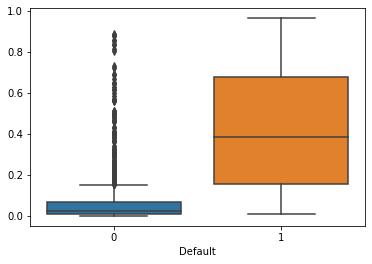

In [160]:
sns.boxplot(x=Default_train22['Default'],y=y_prob_pred_24)
plt.xlabel('Default');

In [161]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train22['Default'],y_prob_pred_24)

In [162]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.10759070415451749

In [163]:
y_prob_pred_train = model_24.predict(Default_train22)
y_prob_pred_train.round(3)

2011   0.11
697    0.01
160    0.06
1273   0.04
541    0.10
       ... 
1386   0.01
1127   0.01
950    0.02
1058   0.03
562    0.25
Length: 1378, dtype: float64

### Logistic Regression: 

In [164]:
#Let us now see the predicted classes

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.10759070415451749:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [165]:
from sklearn import metrics

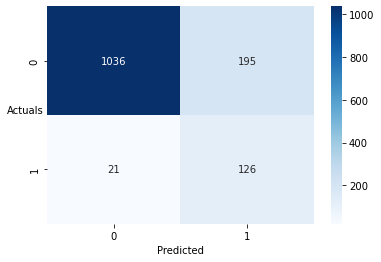

In [166]:
sns.heatmap((metrics.confusion_matrix(Default_train22['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [167]:
confusion_matrix = metrics.confusion_matrix(Default_train22['Default'], y_class_pred)
confusion_matrix

array([[1036,  195],
       [  21,  126]])

In [168]:
print(metrics.classification_report(Default_train22['Default'],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1231
           1       0.39      0.86      0.54       147

    accuracy                           0.84      1378
   macro avg       0.69      0.85      0.72      1378
weighted avg       0.92      0.84      0.87      1378



In [169]:
# predicted probability values on test dataset

y_prob_pred_test = model_24.predict(Default_test)
y_prob_pred_test.round(3)

974    0.01
134    0.02
1267   0.02
464    0.00
579    0.01
       ... 
1792   0.08
443    0.07
621    0.02
518    0.01
2057   0.02
Length: 680, dtype: float64

In [170]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.10759070415451749:
        a=1
    else:
        a=0
    y_class_pred.append(a)

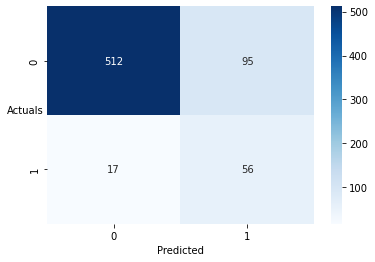

In [171]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [172]:
confusion_matrix = metrics.confusion_matrix(Default_test['Default'], y_class_pred)
confusion_matrix

array([[512,  95],
       [ 17,  56]])

In [173]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.968     0.843     0.901       607
           1      0.371     0.767     0.500        73

    accuracy                          0.835       680
   macro avg      0.669     0.805     0.701       680
weighted avg      0.904     0.835     0.858       680



In [174]:
# Predicted probabilities and true labels for training data
y_prob_pred_train = model_24.predict(Default_train22)
y_true_train = Default_train['Default']

# Predicted probabilities and true labels for test data
y_prob_pred_test = model_24.predict(Default_test)
y_true_test = Default_test['Default']

AUC for the Training Data: 0.913
AUC for the Test Data: 0.893


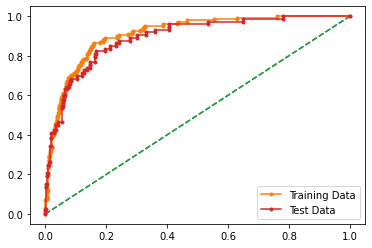

In [175]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# AUC and ROC for the training data
# Calculate AUC
auc_train = metrics.roc_auc_score(y_true_train, y_prob_pred_train)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_true_train, y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_true_test, y_prob_pred_test)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_true_test, y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()


# SMOTE 

In [176]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy = .75)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [177]:
y_train_res.value_counts(1)

0   0.57
1   0.43
Name: Default, dtype: float64

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model_smote = LogisticRegression()
model_smote.fit(X_train_res, y_train_res)

pred_train_smote = model_smote.predict(X_train_res)
pred_test_smote = model_smote.predict(X_test)

print("Training Set Evaluation:")
print(classification_report(y_train_res, pred_train_smote))

print("Test Set Evaluation:")
print(classification_report(y_test, pred_test_smote))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1231
           1       0.84      0.85      0.85       923

    accuracy                           0.87      2154
   macro avg       0.86      0.87      0.87      2154
weighted avg       0.87      0.87      0.87      2154

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       607
           1       0.40      0.70      0.51        73

    accuracy                           0.86       680
   macro avg       0.68      0.79      0.71       680
weighted avg       0.90      0.86      0.87       680



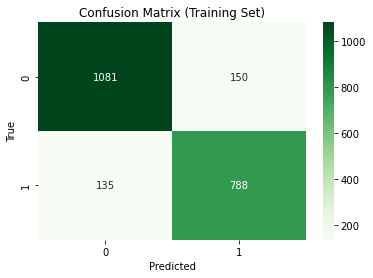

In [188]:

cm_train = confusion_matrix(y_train_res, pred_train_smote)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()


In [189]:
cm_train = confusion_matrix(y_train_res, pred_train_smote)
print("Confusion Matrix (Training Set):")
print(cm_train)

Confusion Matrix (Training Set):
[[1081  150]
 [ 135  788]]


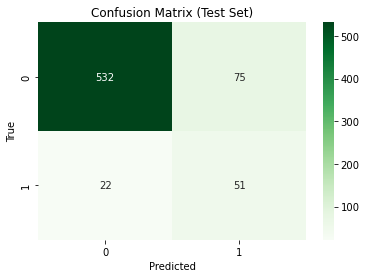

In [186]:
cm_test = confusion_matrix(y_test, pred_test_smote)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


In [191]:
cm_test = confusion_matrix(y_test, pred_test_smote)
print("Confusion Matrix (Test Set):")
print(cm_test)

Confusion Matrix (Test Set):
[[532  75]
 [ 22  51]]


AUC for the Training Data: 0.866
AUC for the Test Data: 0.788


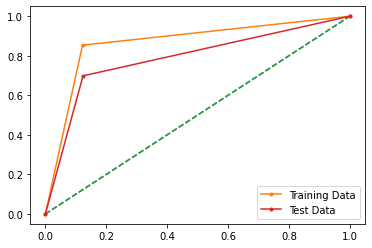

In [192]:
import matplotlib.pyplot as plt
from sklearn import metrics

# AUC and ROC for the training data
# Calculate AUC
auc_train = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()



# Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [195]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [199]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 50}

In [200]:
best_grid = grid_search.best_estimator_

In [201]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [202]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1231
           1       0.92      0.44      0.60       147

    accuracy                           0.94      1378
   macro avg       0.93      0.72      0.78      1378
weighted avg       0.93      0.94      0.93      1378



In [203]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       607
           1       0.71      0.33      0.45        73

    accuracy                           0.91       680
   macro avg       0.82      0.66      0.70       680
weighted avg       0.90      0.91      0.90       680



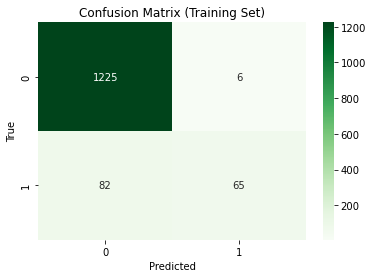

In [204]:
cm_train = confusion_matrix(y_train, pred_train_rf)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()


In [205]:
cm_train = confusion_matrix(y_train, pred_train_rf)
cm_train

array([[1225,    6],
       [  82,   65]])

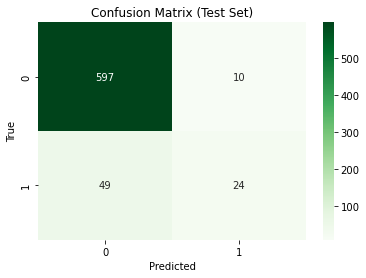

In [206]:
cm_test = confusion_matrix(y_test, pred_test_rf)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [207]:
cm_test = confusion_matrix(y_test, pred_test_rf)
cm_test

array([[597,  10],
       [ 49,  24]])

AUC for the Training Data: 0.969
AUC for the Test Data: 0.913


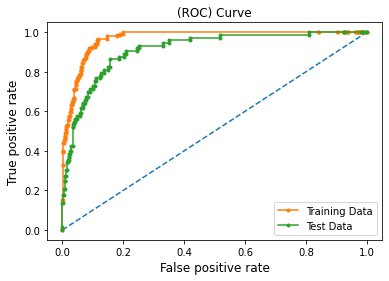

In [208]:
# AUC and ROC for the training data
# Predict probabilities
probs_train = best_grid.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# Calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(train_fpr, train_tpr, marker='.', label='Training Data')

# AUC and ROC for the test data
# Predict probabilities
probs_test = best_grid.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# Calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve for test data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
# Plot the ROC curve for the model on test data
plt.plot(test_fpr, test_tpr, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best')

# Set labels and title
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('(ROC) Curve')

# Show the plot
plt.show()


AUC for the Training Data: 0.969


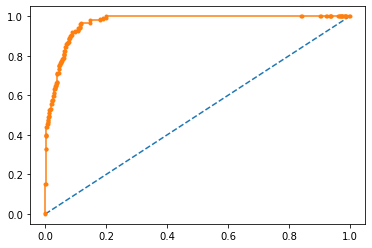

In [209]:
# Calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(train_fpr, train_tpr, marker='.', label='Training Data')

# AUC and ROC for the test data
# Predict probabilities
probs_test = best_grid.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

AUC for the Test Data: 0.913


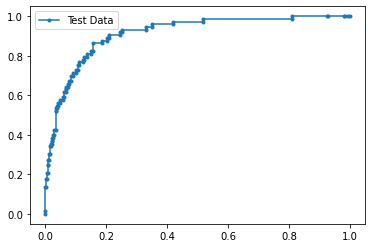

In [212]:
# Calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve for test data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
# Plot the ROC curve for the model on test data
plt.plot(test_fpr, test_tpr, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best');

In [213]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy = .75)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model_smote = RandomForestClassifier()
model_smote.fit(X_train_res, y_train_res)

pred_train_smote = model_smote.predict(X_train_res)
pred_test_smote = model_smote.predict(X_test)

print("Training Set Evaluation:")
print(classification_report(y_train_res, pred_train_smote))

print("Test Set Evaluation:")
print(classification_report(y_test, pred_test_smote))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1231
           1       1.00      1.00      1.00       923

    accuracy                           1.00      2154
   macro avg       1.00      1.00      1.00      2154
weighted avg       1.00      1.00      1.00      2154

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       607
           1       0.55      0.52      0.54        73

    accuracy                           0.90       680
   macro avg       0.75      0.73      0.74       680
weighted avg       0.90      0.90      0.90       680



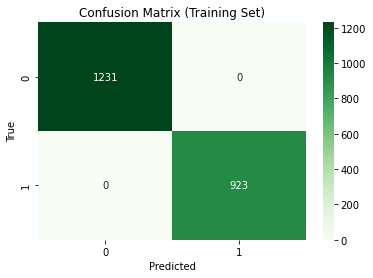

In [215]:
cm_train = confusion_matrix(y_train_res, pred_train_smote)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()


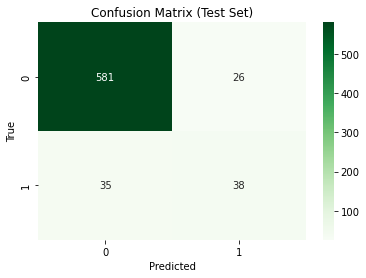

In [189]:
cm_test = confusion_matrix(y_test, pred_test_smote)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

AUC for the Training Data: 1.000
AUC for the Test Data: 0.739


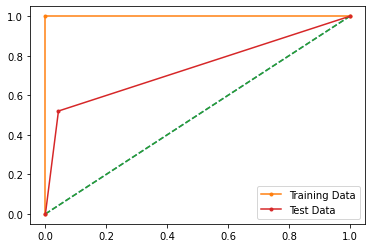

In [190]:
import matplotlib.pyplot as plt
from sklearn import metrics

# AUC and ROC for the training data
# Calculate AUC
auc_train = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()

AUC for the Training Data: 1.000


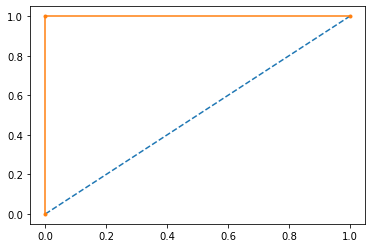

In [218]:
# AUC and ROC for the training data
# Calculate AUC
auc_train = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data');



AUC for the Test Data: 0.735


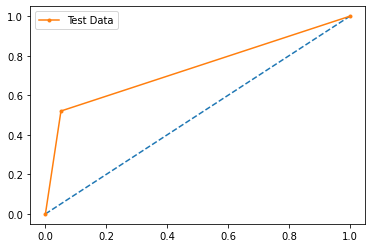

In [220]:
# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best');

# Show the plot


# Linear Discriminant Analysis

In [234]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [235]:
LDA = LinearDiscriminantAnalysis()

In [236]:
lda_model = LDA.fit(X_train, y_train)

In [237]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [238]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1231
           1       0.64      0.48      0.55       147

    accuracy                           0.92      1378
   macro avg       0.79      0.73      0.75      1378
weighted avg       0.91      0.92      0.91      1378



In [239]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       607
           1       0.60      0.48      0.53        73

    accuracy                           0.91       680
   macro avg       0.77      0.72      0.74       680
weighted avg       0.90      0.91      0.91       680



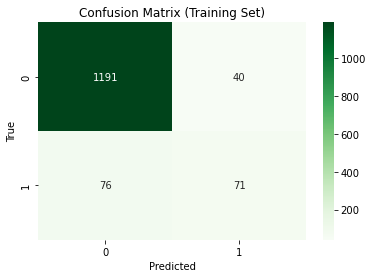

In [240]:
cm_train = confusion_matrix(y_train, pred_train_lda)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()


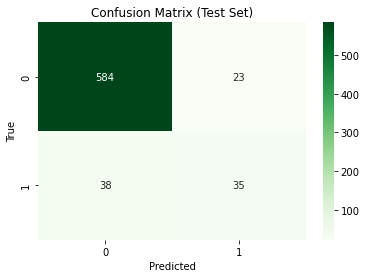

In [241]:
cm_test = confusion_matrix(y_test, pred_test_lda)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

AUC for the Training Data: 0.921
AUC for the Test Data: 0.893


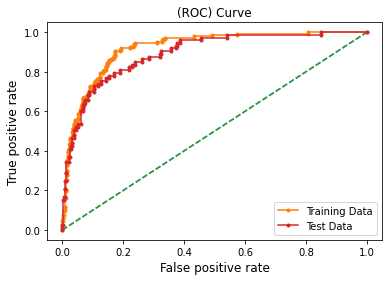

In [242]:
# AUC and ROC for the training data
# Predict probabilities
probs_train = lda_model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# Calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Predict probabilities
probs_test = lda_model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# Calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Set labels and title
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('(ROC) Curve')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()


AUC for the Training Data: 0.921


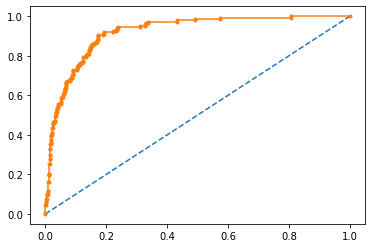

In [243]:
# Calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Predict probabilities
probs_test = lda_model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

AUC for the Test Data: 0.893


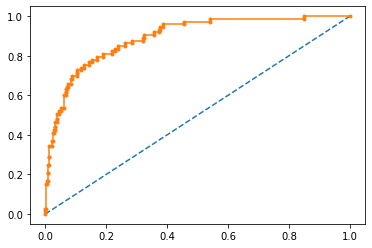

In [244]:
# Calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data');


In [245]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [246]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [247]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06656909141457523

In [248]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.06656909141457523:
        a=1
    else:
        a=0
    y_class_pred.append(a)

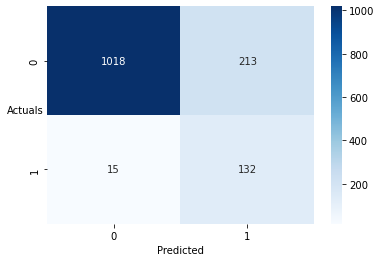

In [249]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [258]:
from sklearn.metrics import classification_report

print(classification_report(y_train[:len(y_class_pred)], y_class_pred, digits=3))


              precision    recall  f1-score   support

           0      0.925     0.790     0.852       620
           1      0.133     0.333     0.190        60

    accuracy                          0.750       680
   macro avg      0.529     0.562     0.521       680
weighted avg      0.855     0.750     0.794       680



In [259]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.06656909141457523:
        a=1
    else:
        a=0
    y_class_pred.append(a)

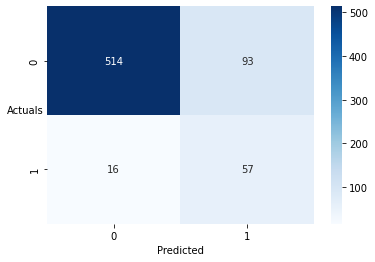

In [260]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [261]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.970     0.847     0.904       607
           1      0.380     0.781     0.511        73

    accuracy                          0.840       680
   macro avg      0.675     0.814     0.708       680
weighted avg      0.906     0.840     0.862       680



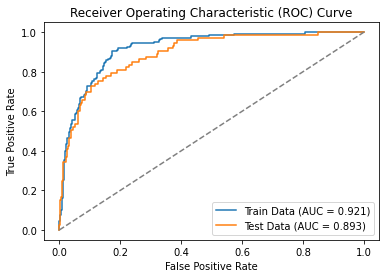

In [262]:
# Plot AUC-ROC curve for the training data
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_train_lda_prob)
auc_train = metrics.auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label=f'Train Data (AUC = {auc_train:.3f})')

# Plot AUC-ROC curve for the test data
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_lda_prob)
auc_test = metrics.auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label=f'Test Data (AUC = {auc_test:.3f})')

# Configure plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Display plot
plt.show()

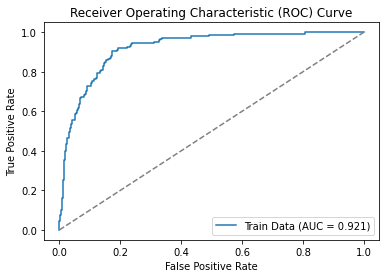

In [264]:
# Plot AUC-ROC curve for the training data
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_train_lda_prob)
auc_train = metrics.auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label=f'Train Data (AUC = {auc_train:.3f})')

# Configure plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Display plot
plt.show()

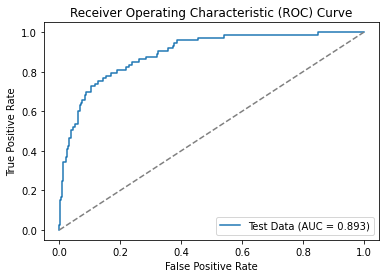

In [265]:

# Plot AUC-ROC curve for the test data
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_lda_prob)
auc_test = metrics.auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label=f'Test Data (AUC = {auc_test:.3f})')

# Configure plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Display plot
plt.show()

# SMOTE

In [266]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy = .75)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model_smote = LinearDiscriminantAnalysis()
model_smote.fit(X_train_res, y_train_res)

pred_train_smote = model_smote.predict(X_train_res)
pred_test_smote = model_smote.predict(X_test)

print("Training Set Evaluation:")
print(classification_report(y_train_res, pred_train_smote))

print("Test Set Evaluation:")
print(classification_report(y_test, pred_test_smote))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1231
           1       0.84      0.85      0.84       923

    accuracy                           0.87      2154
   macro avg       0.86      0.86      0.86      2154
weighted avg       0.87      0.87      0.87      2154

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       607
           1       0.43      0.70      0.53        73

    accuracy                           0.87       680
   macro avg       0.69      0.79      0.73       680
weighted avg       0.90      0.87      0.88       680



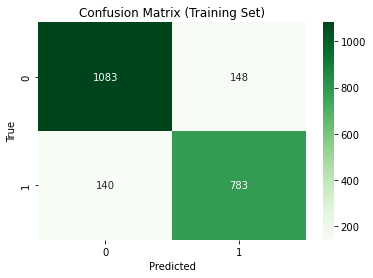

In [268]:
cm_train = confusion_matrix(y_train_res, pred_train_smote)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()


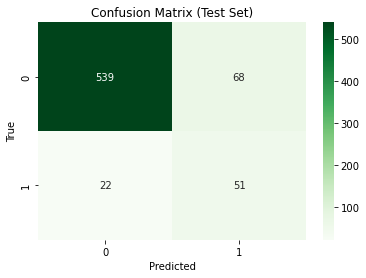

In [269]:
cm_test = confusion_matrix(y_test, pred_test_smote)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

AUC for the Training Data: 0.864
AUC for the Test Data: 0.793


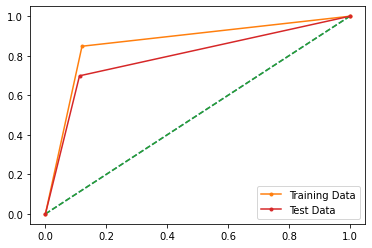

In [270]:
import matplotlib.pyplot as plt
from sklearn import metrics

# AUC and ROC for the training data
# Calculate AUC
auc_train = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()

AUC for the Training Data: 0.864


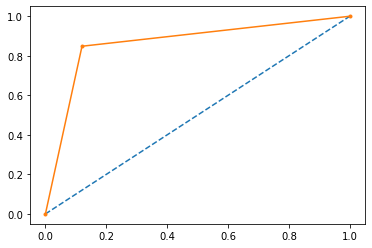

In [272]:
# AUC and ROC for the training data
# Calculate AUC
auc_train = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data');

AUC for the Test Data: 0.793


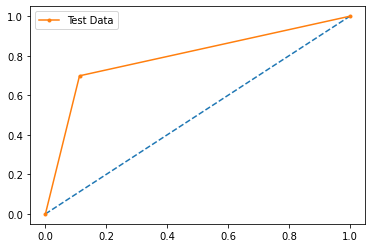

In [273]:
# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.show()